# Telecom Churn Case Study

`Probelm`: We need to predict customers which have high risk of churn as it is difficult to accquire new cutomers than to retain<br><br>
`Location`: India and South East Asia<br><br>
`Churn Type`: We are mainly focusing on `Usage Based Churn ` i.e. who have stopped using servies for a while<br><br>
`Taget`: We need to focus on High Value Customers(HVC) as 80% of the renveue is genrated by them<br><br>
`Period`: June - Septemeber<br><br>

**Steps involved:**
1. Data Understanding
2. Missing value Treatment and formatting
3. Filtering High value Customers
4. Outlier Analysis
5. Derving the Churn column
6. EDA
7. Train- Test split and Handling Class Imbalance
8. Scaling the Variables
9. Modelling and Evalution<br>
    a. Model with PCA and good prediction 
        - Logistic Regression with L2 regularization
        - SVM
        - Logistic Regression with L1 regularization
        - Random Forest
    b. Interpretiable Model
        - Logistic Regression
        - Random Forset
10. Summary
        
**_Goal_**: To create a model with good accuracy and other metrics and also to find top varaibles

In [1]:
#Importing libraries

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


#Iterattive Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#To Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading dataset

pd.set_option('display.max_columns', None)
tel = pd.read_csv('telecom_churn_data.csv')
tel.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

## 1. Data Understanding

In [3]:
# Information about the data

print(tel.shape)
tel.info()

(99999, 226)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [4]:
# Looking into statistical summary

tel.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

## 2. Missing value treatment and formatting

In [5]:
#Looking for value count of all the variables

for i in tel.columns:
    print(tel[i].value_counts())
    print("______________________________")

7002374769    1
7001115332    1
7000945323    1
7001852588    1
7000146605    1
             ..
7001315706    1
7000616311    1
7000389462    1
7001775481    1
7000817664    1
Name: mobile_number, Length: 99999, dtype: int64
______________________________
109    99999
Name: circle_id, dtype: int64
______________________________
0.0    98981
Name: loc_og_t2o_mou, dtype: int64
______________________________
0.0    98981
Name: std_og_t2o_mou, dtype: int64
______________________________
0.0    98981
Name: loc_ic_t2o_mou, dtype: int64
______________________________
6/30/2014    99999
Name: last_date_of_month_6, dtype: int64
______________________________
7/31/2014    99398
Name: last_date_of_month_7, dtype: int64
______________________________
8/31/2014    98899
Name: last_date_of_month_8, dtype: int64
______________________________
9/30/2014    98340
Name: last_date_of_month_9, dtype: int64
______________________________
 0.000      3731
 20.000       99
-5.000        96
 1.000        69
 

0.00     73299
0.01       249
0.13       195
0.03       181
0.06       173
         ...  
10.39        1
44.18        1
43.29        1
45.03        1
13.65        1
Name: loc_og_t2c_mou_8, Length: 2516, dtype: int64
______________________________
0.00     72758
0.01       221
0.06       185
0.05       161
0.03       157
         ...  
36.81        1
34.21        1
24.23        1
22.04        1
19.39        1
Name: loc_og_t2c_mou_9, Length: 2332, dtype: int64
______________________________
0.00       8200
0.63         41
0.23         37
0.28         37
0.01         37
           ... 
465.54        1
150.54        1
464.46        1
2408.06       1
1001.16       1
Name: loc_og_mou_6, Length: 26372, dtype: int64
______________________________
0.00       7998
0.03         43
0.56         39
2.48         38
0.33         38
           ... 
421.68        1
809.93        1
1357.78       1
475.89        1
241.34        1
Name: loc_og_mou_7, Length: 26091, dtype: int64
___________________________

0.00       14143
0.21          81
0.20          49
0.43          35
1.01          33
           ...  
954.74         1
101.61         1
2041.63        1
1419.18        1
778.66         1
Name: total_og_mou_9, Length: 39160, dtype: int64
______________________________
0.00      12379
0.38        104
0.33        100
0.36        100
0.43         97
          ...  
285.84        1
187.78        1
267.28        1
233.34        1
501.64        1
Name: loc_ic_t2t_mou_6, Length: 13540, dtype: int64
______________________________
0.00       11708
0.78         116
0.33         107
0.26          97
0.66          94
           ...  
1199.96        1
305.38         1
12.30          1
159.56         1
108.88         1
Name: loc_ic_t2t_mou_7, Length: 13511, dtype: int64
______________________________
0.00      11505
0.36        105
0.53         99
0.43         96
0.40         95
          ...  
105.36        1
76.73         1
563.51        1
201.48        1
125.41        1
Name: loc_ic_t2t_mou_8, Len

0.00       9345
0.46         22
0.33         21
0.66         20
0.26         20
           ... 
341.21        1
168.86        1
1041.38       1
667.59        1
760.14        1
Name: total_ic_mou_8, Length: 32128, dtype: int64
______________________________
0.00       11485
0.25          28
0.26          24
0.28          23
0.53          22
           ...  
396.74         1
333.53         1
283.84         1
5861.24        1
419.54         1
Name: total_ic_mou_9, Length: 31260, dtype: int64
______________________________
0.00    75316
0.15     1653
0.18      948
0.06      895
0.13      893
        ...  
1.33        1
2.18        1
2.83        1
2.33        1
3.56        1
Name: spl_ic_mou_6, Length: 84, dtype: int64
______________________________
0.00     85588
0.20      1254
0.18       773
0.06       481
0.05       455
         ...  
1.58         1
12.34        1
1.50         1
21.33        1
5.88         1
Name: spl_ic_mou_7, Length: 107, dtype: int64
______________________________
0.0

0.0     15788
1.0      7001
2.0      1847
3.0       566
4.0       278
5.0       157
6.0        66
8.0        51
7.0        45
11.0       24
10.0       18
9.0        16
13.0       16
12.0       14
15.0        6
16.0        5
18.0        4
21.0        4
19.0        3
26.0        3
14.0        2
24.0        2
22.0        2
23.0        1
49.0        1
27.0        1
39.0        1
Name: count_rech_3g_9, dtype: int64
______________________________
154.0    3718
252.0    1889
198.0    1074
25.0      962
98.0      794
         ... 
18.5        1
589.0       1
703.0       1
943.0       1
427.5       1
Name: av_rech_amt_data_6, Length: 887, dtype: int64
______________________________
154.0     3686
252.0     1869
198.0     1165
25.0       825
50.0       801
          ... 
591.0        1
792.0        1
1411.0       1
117.5        1
2320.0       1
Name: av_rech_amt_data_7, Length: 961, dtype: int64
______________________________
154.0     3320
252.0     2022
198.0     1212
25.0      1055
17.0      

In [6]:
# Dropping columns which are skewwed and contain only one value

skew_list = ['std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9',"std_ic_t2o_mou_6", "std_ic_t2o_mou_7", "std_ic_t2o_mou_8", "std_ic_t2o_mou_9"]

tel.drop(skew_list, axis =1, inplace = True)

In [7]:
# Checking the value count of night pack

night_pack = ['night_pck_user_6','night_pck_user_7', 'night_pck_user_8','night_pck_user_9']

for i in night_pack:
    print(tel[i].value_counts(dropna = False))
    print("______________________")

NaN    74846
0.0    24522
1.0      631
Name: night_pck_user_6, dtype: int64
______________________
NaN    74428
0.0    24982
1.0      589
Name: night_pck_user_7, dtype: int64
______________________
NaN    73660
0.0    25790
1.0      549
Name: night_pck_user_8, dtype: int64
______________________
NaN    74077
0.0    25508
1.0      414
Name: night_pck_user_9, dtype: int64
______________________


In [8]:
#Converting them in string format

for i in night_pack:
    tel[i] = tel[i].astype('str')

In [9]:
# Replacing all the nan values with other, As other can another scheme pack

for i in night_pack:
    tel[i] = tel[i].replace({"nan" : 'Other'})

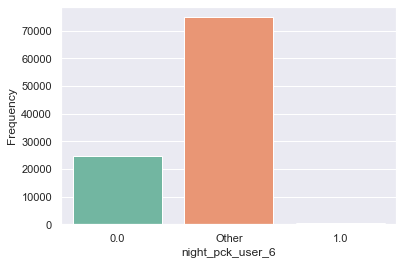

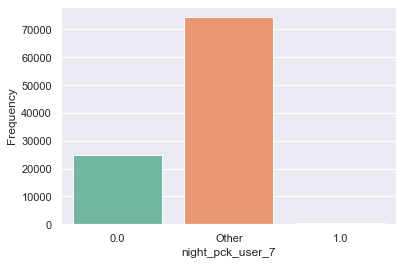

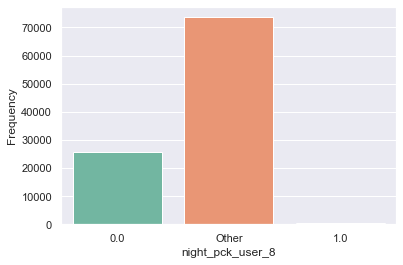

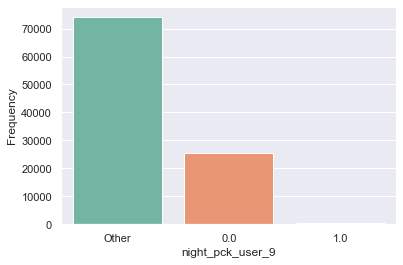

In [10]:
# Looking into Night pack schemes over all the night columns

sns.set()
night_pack = ['night_pck_user_6','night_pck_user_7', 'night_pck_user_8','night_pck_user_9']

for i, col in enumerate(night_pack):
    plt.figure(i)
    sns.countplot(tel[col], palette = "Set2")
    plt.ylabel('Frequency')

In [11]:
# Creating dummuies for night_pack

dummy1 = pd.get_dummies(tel[night_pack])

# Adding the results to the master dataframe
tel = pd.concat([tel, dummy1], axis=1)

tel.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_6_Other,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_7_Other,night_pck_user_8_0.0,night_pck_user_8_1.0,night_pck_user_8_Other,night_pck_user_9_0.0,night_pck_user_9_1.0,night_pck_user_9_Other
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,N

In [12]:
# Now we want to specificly drop the other column for month 6,7,8,9

drop_list = ['night_pck_user_6_Other', 'night_pck_user_7_Other', 'night_pck_user_8_Other', 'night_pck_user_9_Other']
tel.drop(drop_list, axis = 1, inplace = True)        

In [13]:
# listing all the fb columns 

fb_list = []

for col in tel.columns:
    if 'fb' in col:
        fb_list.append(col)

In [14]:
#Observing value count for all the fb users

for i in fb_list:
    print(tel[i].value_counts(dropna = False))
    print("______________________")

NaN    74846
1.0    23000
0.0     2153
Name: fb_user_6, dtype: int64
______________________
NaN    74428
1.0    23238
0.0     2333
Name: fb_user_7, dtype: int64
______________________
NaN    73660
1.0    23463
0.0     2876
Name: fb_user_8, dtype: int64
______________________
NaN    74077
1.0    22318
0.0     3604
Name: fb_user_9, dtype: int64
______________________


In [15]:
#Converting it into object format

for i in fb_list:
    tel[i] = tel[i].astype('str')

In [16]:
# Replacing all the NaN values with Other as category, As other can another scheme pack

for i in fb_list:
    tel[i] = tel[i].replace({"nan":'Other'})

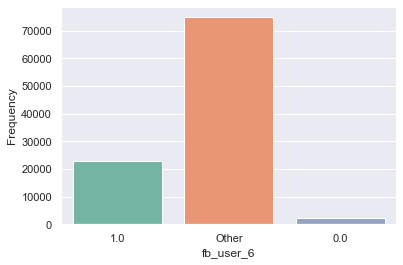

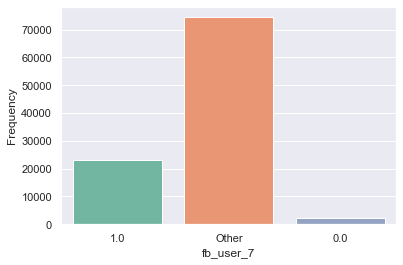

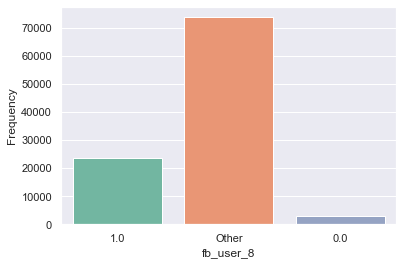

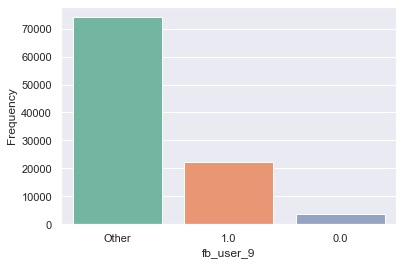

In [17]:
# Looking into FB Users 

for i, col in enumerate(fb_list):
    plt.figure(i)
    sns.countplot(tel[col], palette = "Set2")
    plt.ylabel('Frequency')

In [18]:
#Creating dummies for fb users

dummy1 = pd.get_dummies(tel[fb_list])

# Adding the results to the master dataframe
tel = pd.concat([tel, dummy1], axis=1)

tel.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,night_pck_user_9_0.0,night_pck_user_9_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_6_Other,fb_user_7_0.0,fb_user_7_1.0,fb_user_7_Other,fb_user_8_0.0,fb_user_8_1.0,fb_user_8_Other,fb_user_9_0.0,fb_user_9_1.0,fb_user_9_Other
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,Na

In [19]:
# Now we want to specificly drop the other column for month 6,7,8,9

fb_drop_list = ['fb_user_6_Other', 'fb_user_7_Other', 'fb_user_8_Other', 'fb_user_9_Other',]
tel.drop(fb_drop_list, axis = 1, inplace = True) 

In [20]:
# dropping the main columns which we have used to create dummies

tel.drop(night_pack, inplace = True, axis = 1)
tel.drop(fb_list, inplace = True, axis = 1)

In [21]:
tel.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,night_pck_user_9_0.0,night_pck_user_9_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0,fb_user_9_0.0,fb_user_9_1.0
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,

In [22]:
# Checking the missing value percentage 

null_ = round(100*(tel.isnull().sum()/len(tel)),2)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(null_)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [23]:
#If the person hasn't recharged that means NA so we can impute it with 0

k_list = ['total_rech_data_6', 'av_rech_amt_data_6', 'total_rech_data_7','av_rech_amt_data_7', 'total_rech_data_8', 'av_rech_amt_data_8']

for i in k_list:
    tel[i] = tel[i].fillna(0)

In [24]:
# Checking the value count

lst = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']

for i in lst:
    print(tel[i].value_counts())
    print("______________________")

0.0    98981
Name: loc_og_t2o_mou, dtype: int64
______________________
0.0    98981
Name: std_og_t2o_mou, dtype: int64
______________________
0.0    98981
Name: loc_ic_t2o_mou, dtype: int64
______________________


In [25]:
# As all of them cotain single value and are skweed so we will drop

tel.drop(lst, axis = 1, inplace = True)

In [26]:
# mobile number and circle_id is not going to help in predicting anything so we drop it

tel.drop(['mobile_number','circle_id' ], inplace = True, axis =1)

In [27]:
#Info of the dataframe

tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 221 entries, last_date_of_month_6 to fb_user_9_1.0
dtypes: float64(160), int64(33), object(12), uint8(16)
memory usage: 157.9+ MB


In [28]:
# Checking the missing value percentage 

null_ = round(100*(tel.isnull().sum()/len(tel)),2)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(null_)

last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2t_mou_8             5.38
loc_og_t2t_mou_9             7.75
loc_og_t2m_mou_6             3.94
loc_og_t2m_mou

In [29]:
# Subsetting the data frame to look at missing values

missing_list = tel.columns[tel.isnull().any()].tolist
print(missing_list)

<bound method IndexOpsMixin.tolist of Index(['last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       ...
       'count_rech_3g_9', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9'],
      dtype='object', length=141)>


We can see that there are 141 columns with missing values<br>
- Removing all the columns which have missing values more than 50%

In [30]:
# Drop all the columns in which greater than 50 % missing values are present

tel = tel.drop(tel.loc[:,list(round(100*(tel.isnull().sum()/len(tel.index)), 2)> 50)].columns, 1)
tel.shape

(99999, 195)

In [31]:
# Checking the missing value percentage 

null1=round(100*(tel.isnull().sum()/len(tel.index)), 2)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(null1)

last_date_of_month_6    0.00
last_date_of_month_7    0.60
last_date_of_month_8    1.10
last_date_of_month_9    1.66
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
arpu_9                  0.00
onnet_mou_6             3.94
onnet_mou_7             3.86
onnet_mou_8             5.38
onnet_mou_9             7.75
offnet_mou_6            3.94
offnet_mou_7            3.86
offnet_mou_8            5.38
offnet_mou_9            7.75
roam_ic_mou_6           3.94
roam_ic_mou_7           3.86
roam_ic_mou_8           5.38
roam_ic_mou_9           7.75
roam_og_mou_6           3.94
roam_og_mou_7           3.86
roam_og_mou_8           5.38
roam_og_mou_9           7.75
loc_og_t2t_mou_6        3.94
loc_og_t2t_mou_7        3.86
loc_og_t2t_mou_8        5.38
loc_og_t2t_mou_9        7.75
loc_og_t2m_mou_6        3.94
loc_og_t2m_mou_7        3.86
loc_og_t2m_mou_8        5.38
loc_og_t2m_mou_9        7.75
loc_og_t2f_mou_6        3.94
loc_og_t2f_mou_7        3.86
loc_og_t2f_mou

In [32]:
# we will drop all the columns which have date as we know date is not going to help in predicting 

for col in tel.columns:
    if 'date' in col:
        tel.drop(col, axis = 1, inplace = True)

tel.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,night_pck_user_9_0.0,night_pck_user_9_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0,fb_user_9_0.0,fb_user_9_1.0
0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58,1,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0
1,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.0

In [33]:
# We will impute with median for all the columns which have less than 10% of missing values

for col in tel.columns:
    if (tel[col].isnull().sum()/len(tel)) < 0.1:
        tel[col].fillna(tel[col].median(), inplace = True)

```Tried iterative imputer it is taking a lot of time so going to go with median imputation only```

We have removed all the missing values and proceed with the data

In [34]:
# Lets check if we have any null values in the dataset

tel.isnull().any().sum()

0

## 3. Filter High value customers

In [35]:
# creating a new column avergae total recharge done in month 6 and 7

tel['avg_rech_6_7'] = (tel['total_rech_amt_6'] + tel['total_rech_amt_7'])/2
tel.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,night_pck_user_9_0.0,night_pck_user_9_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0,fb_user_9_0.0,fb_user_9_1.0,avg_rech_6_7
0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,65.11,63.685,0.00,61.84,0.00,0.00,0.00,0.00,3.95,3.635,0.00,2.50,0.00,0.00,0.00,0.0,11.64,11.09,0.00,8.41,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,0.88,0.93,1.15,0.96,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.00,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58,1,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,307.0
1,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.840,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.510,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.460,0.13,0.00,0.00,0.00,0.00,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,17

In [36]:
# Finding HVC i.e. percentile above 70

tel = tel[tel['avg_rech_6_7'] >= tel['avg_rech_6_7'].quantile(.7)]
tel.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,night_pck_user_9_0.0,night_pck_user_9_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0,fb_user_9_0.0,fb_user_9_1.0,avg_rech_6_7
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,29.84,453.43,567.16,325.91,87.29,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,11.26,308.63,447.38,162.28,39.12,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.0,422.16,533.91,255.79,61.84,4.30,23.29,12.01,0.00,49.89,31.76,49.14,2.50,6.66,20.08,16.68,0.00,60.86,75.14,77.84,8.41,0.0,0.18,10.01,0.0,4.50,0.00,6.50,0.00,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,15.66,217.56,221.49,121.19,56.61,152.16,101.46,39.53,0.96,427.88,355.23,188.04,91.64,36.89,11.83,30.39,0.00,91.44,126.99,141.33,1.74,52.19,34.24,22.21,0.0,180.54,173.08,193.94,5.38,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1185.0
8,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.0

In [37]:
tel.shape

(30011, 188)

We have around 30K rows now

## 4. Outlier Analysis

In [38]:
# Subsetting the data into numeric to for checking of outliers

tel_numeric = tel.select_dtypes(include = ['int64', 'float64'])

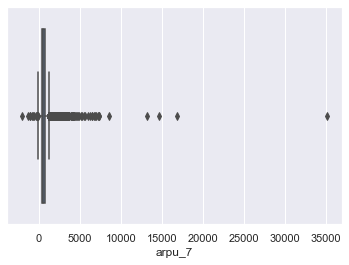

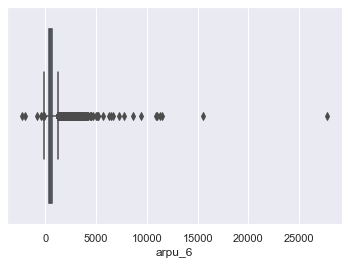

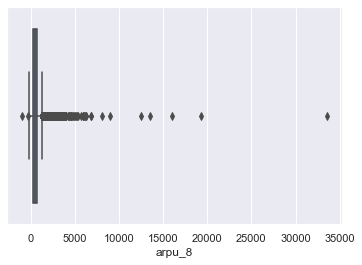

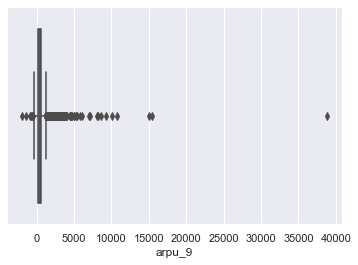

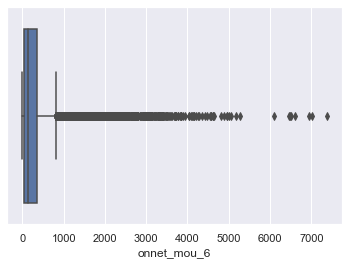

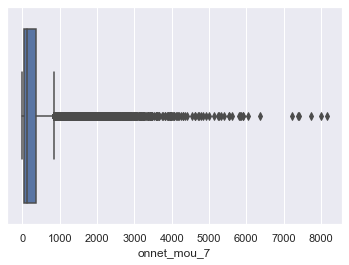

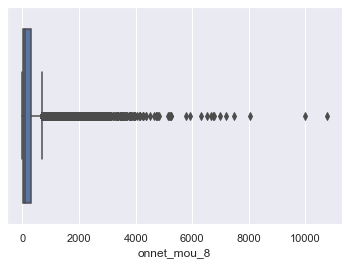

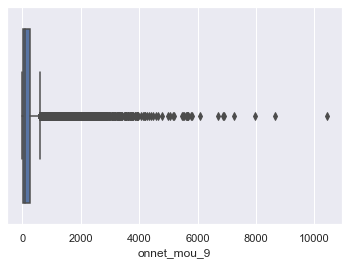

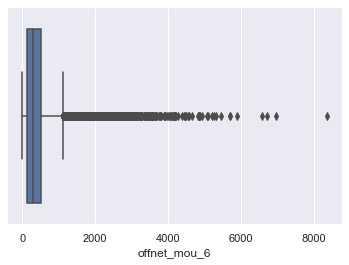

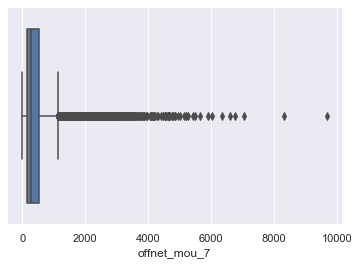

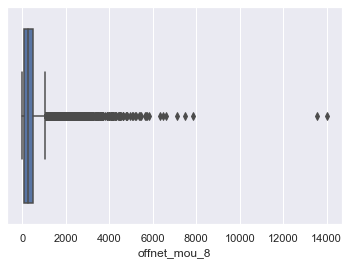

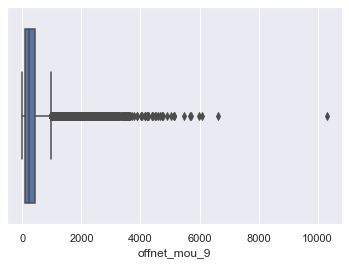

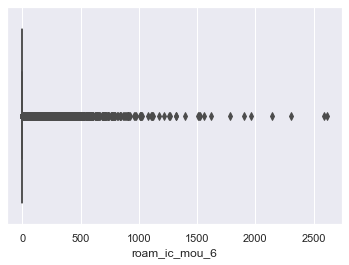

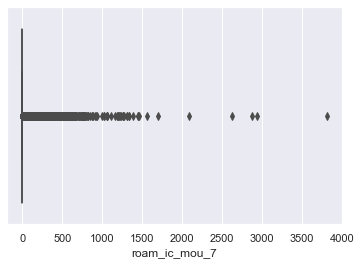

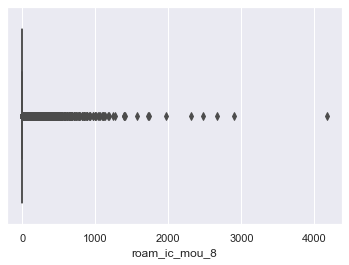

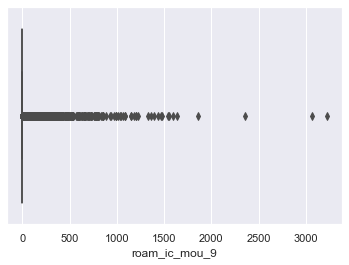

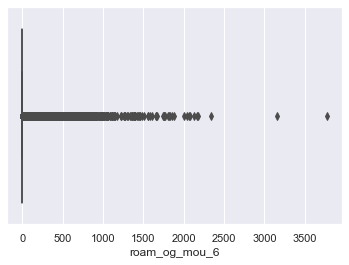

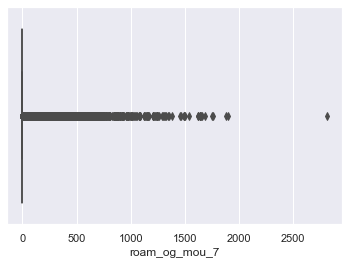

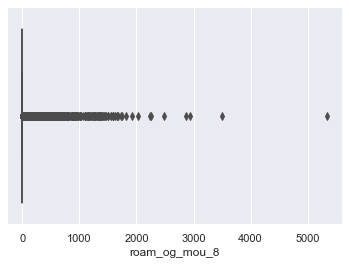

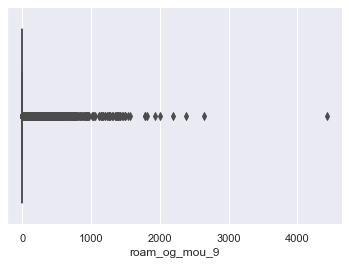

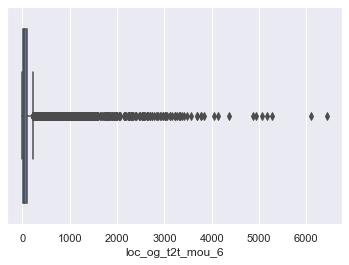

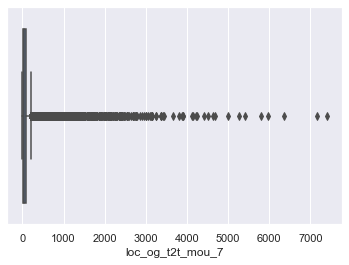

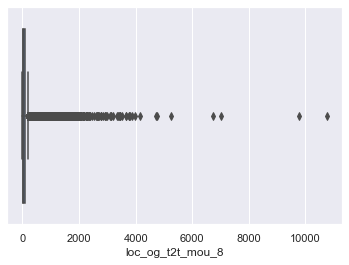

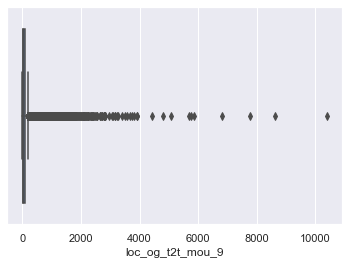

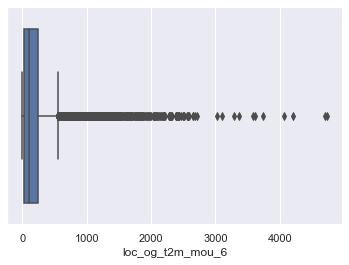

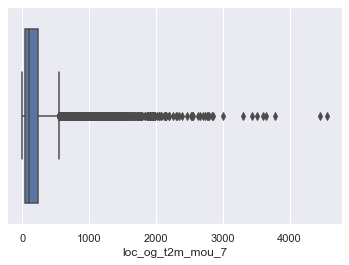

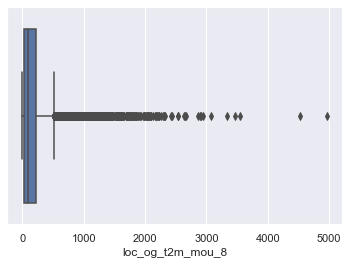

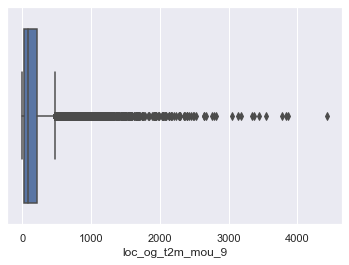

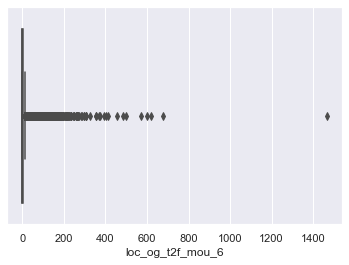

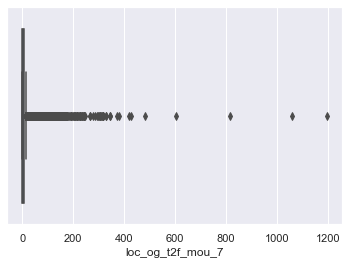

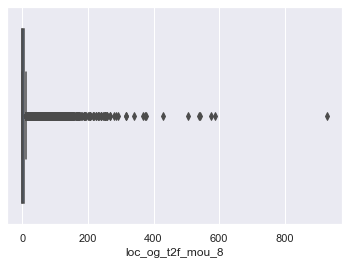

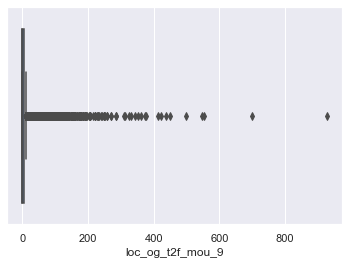

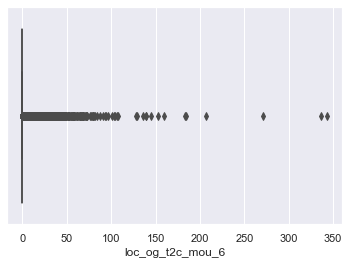

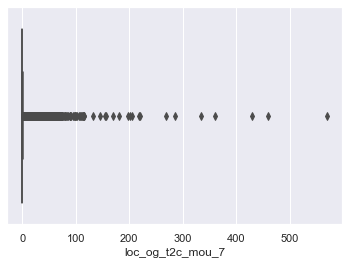

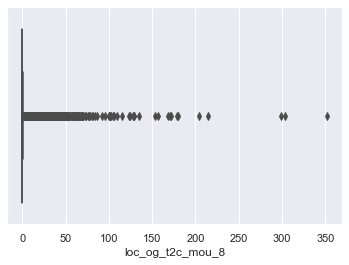

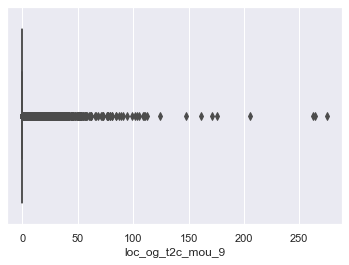

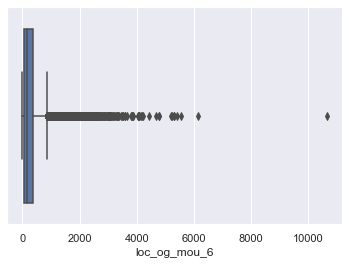

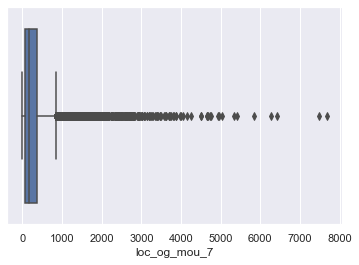

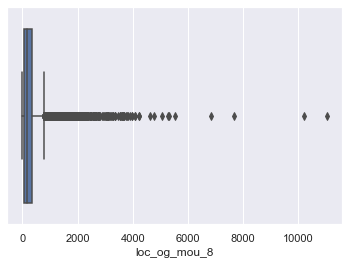

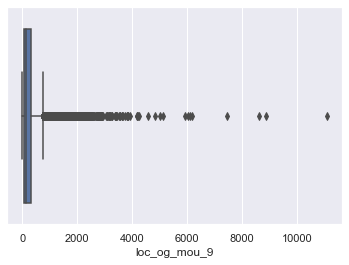

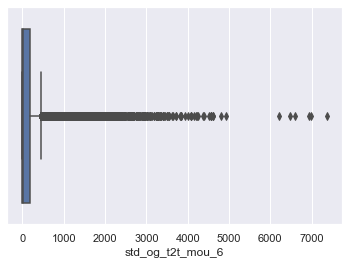

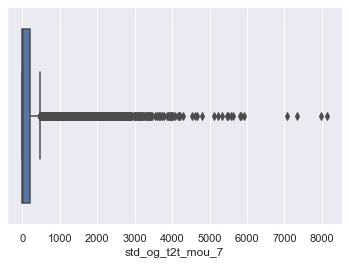

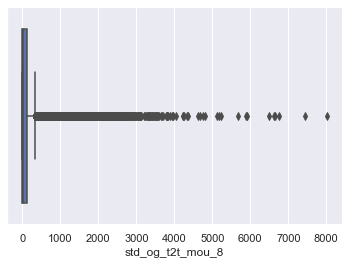

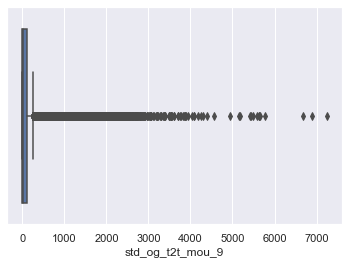

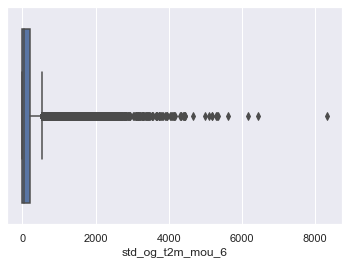

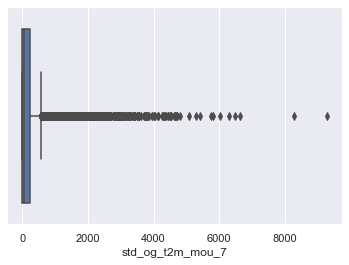

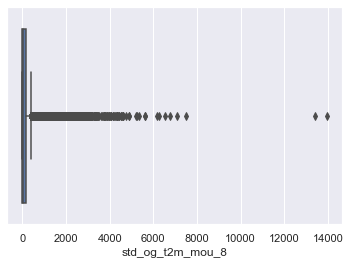

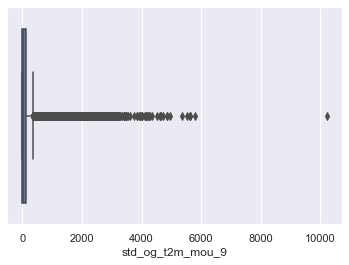

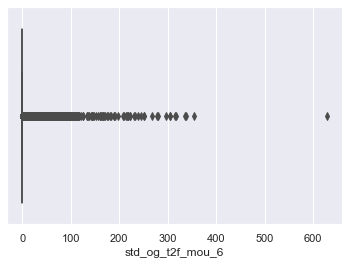

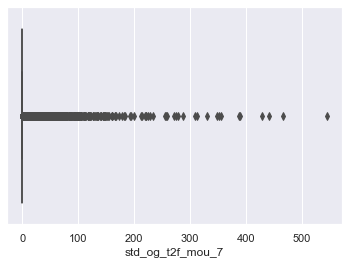

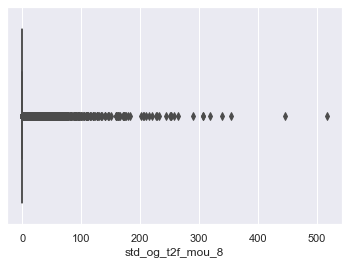

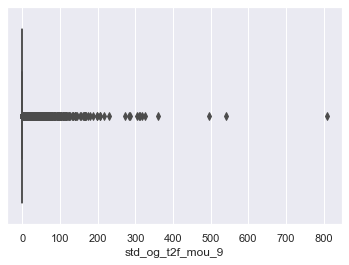

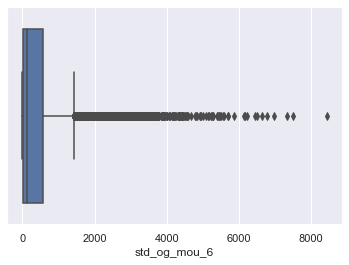

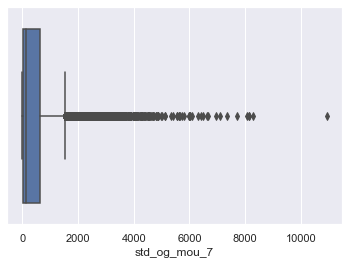

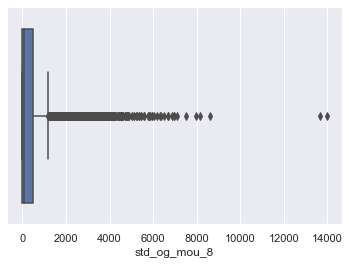

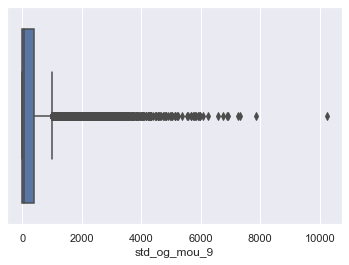

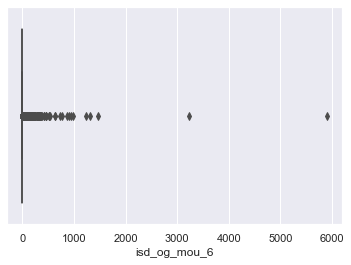

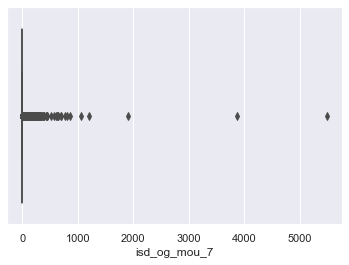

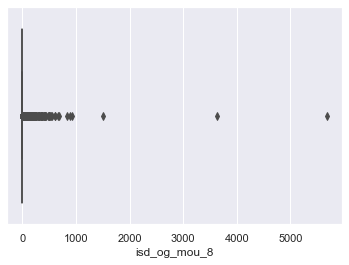

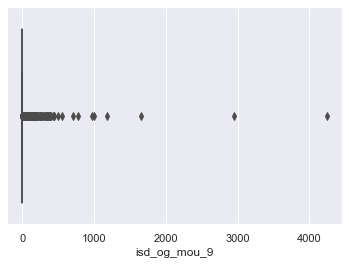

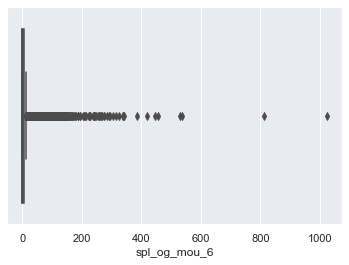

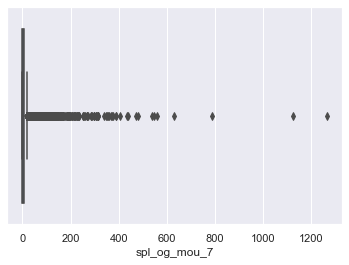

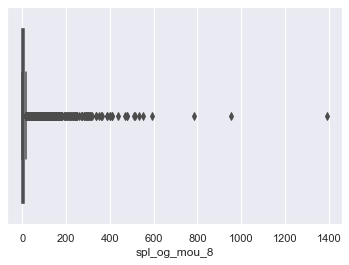

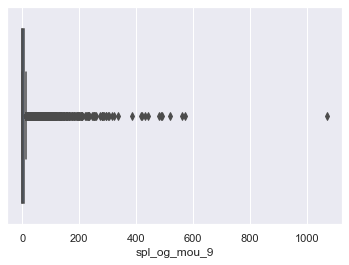

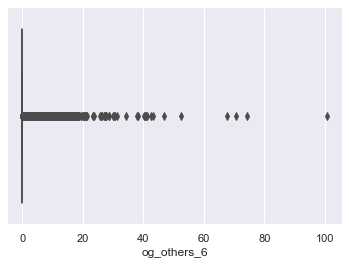

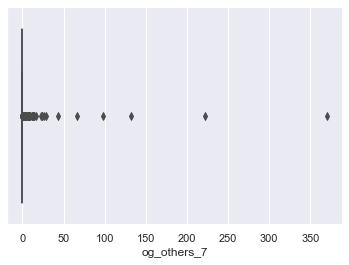

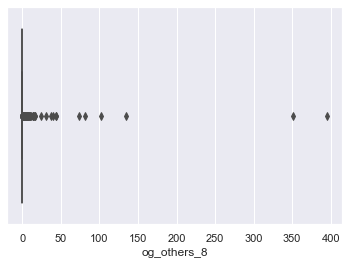

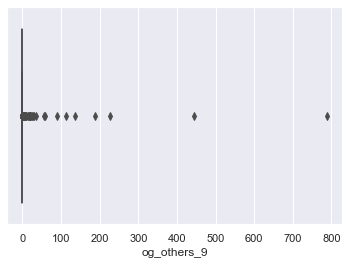

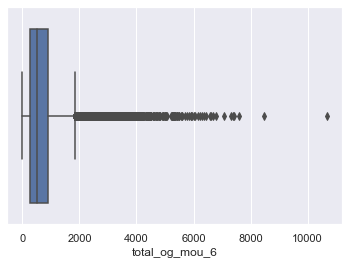

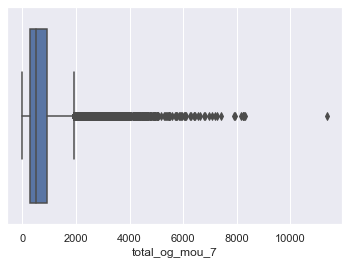

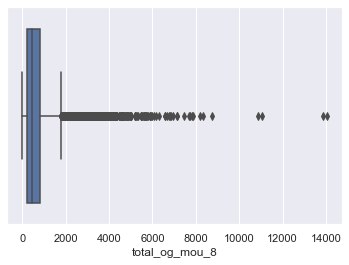

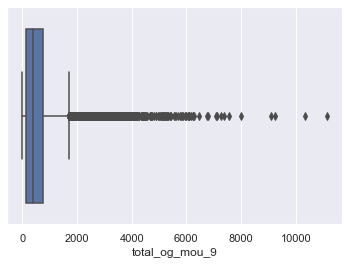

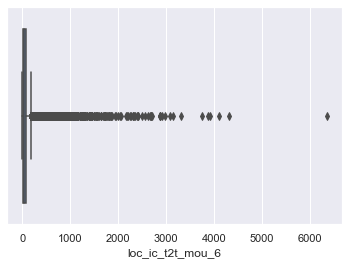

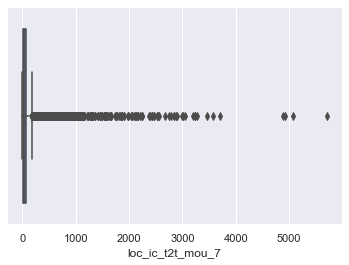

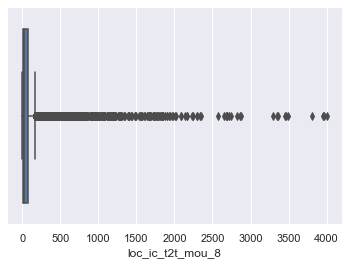

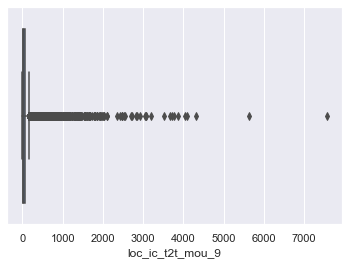

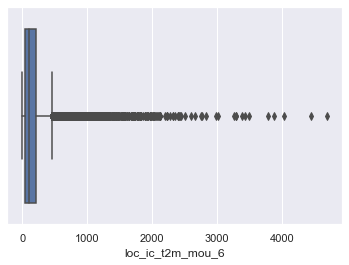

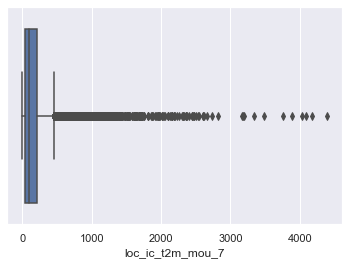

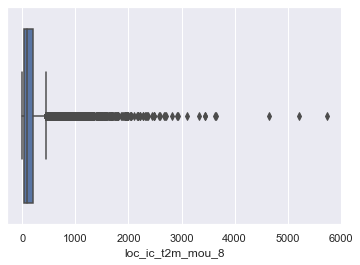

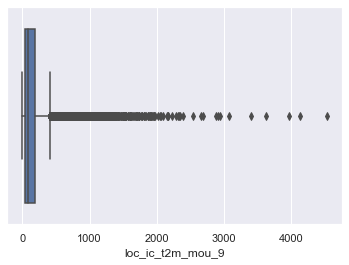

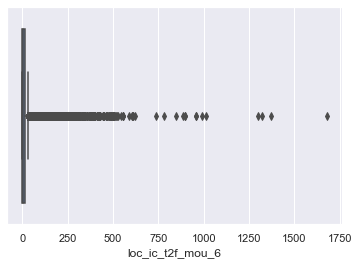

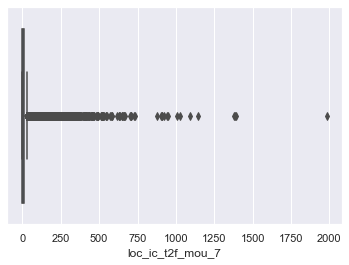

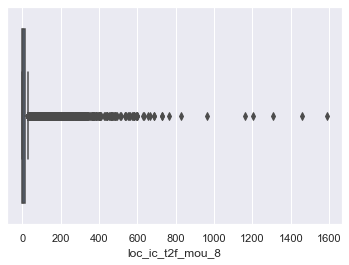

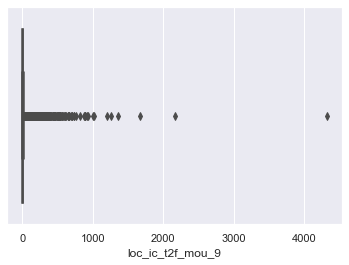

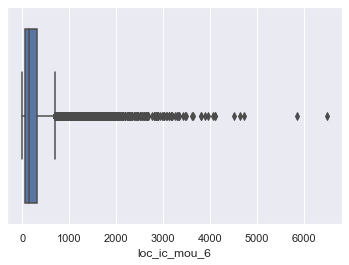

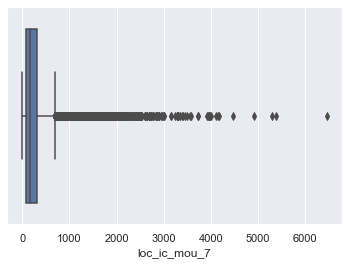

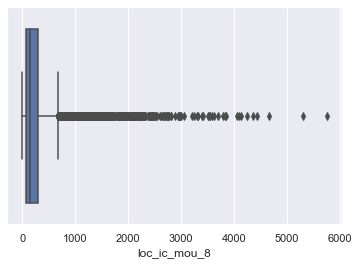

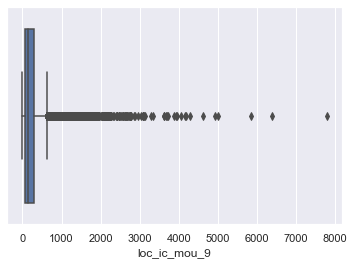

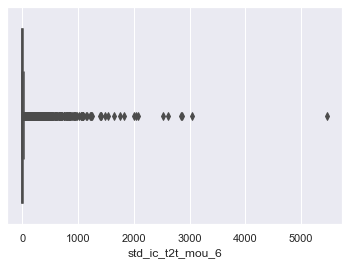

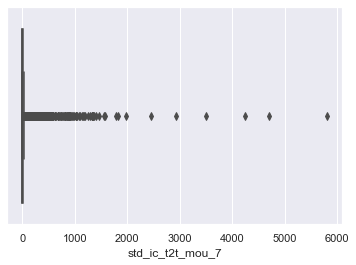

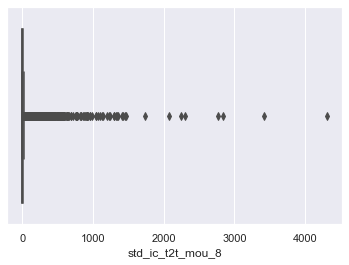

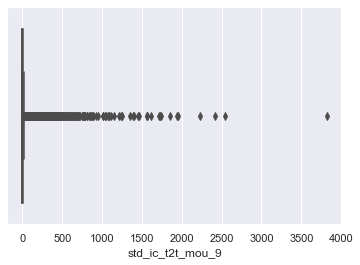

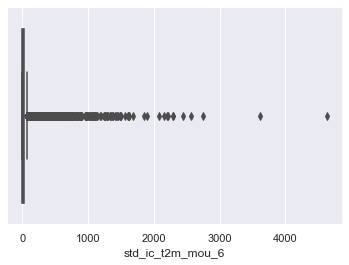

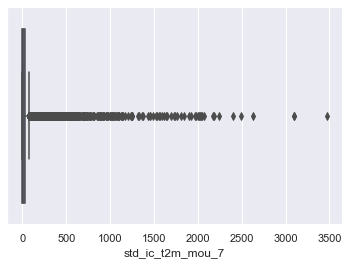

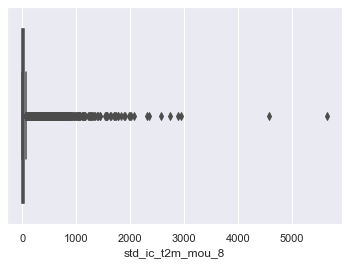

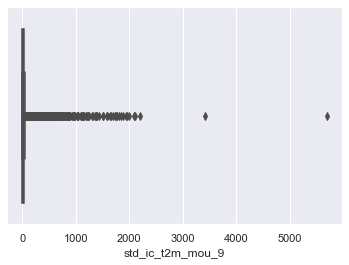

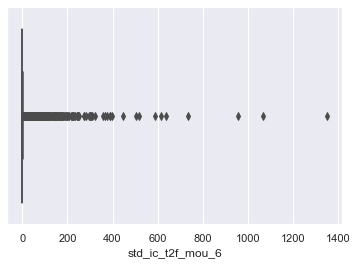

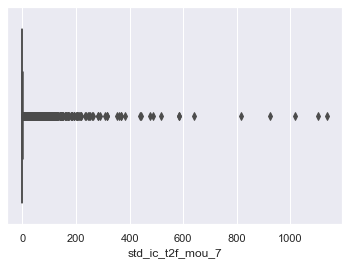

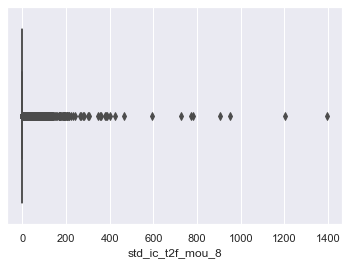

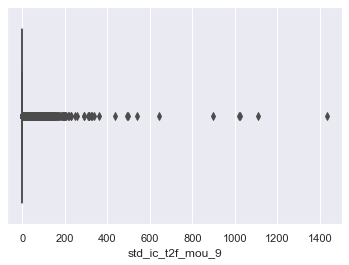

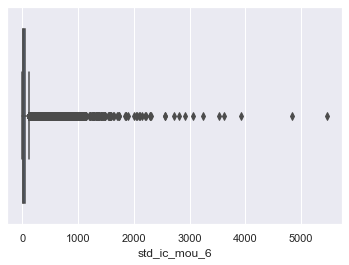

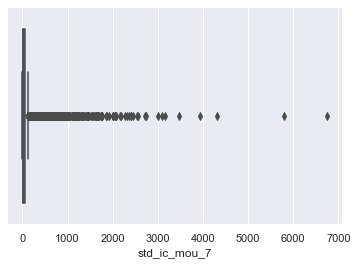

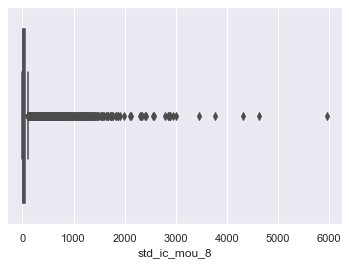

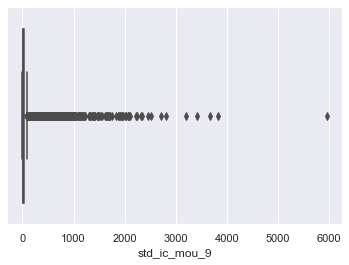

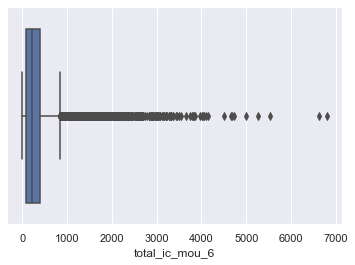

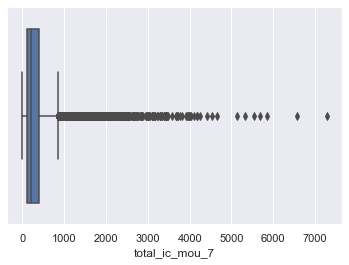

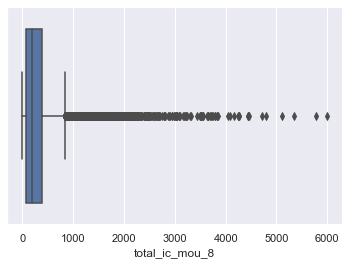

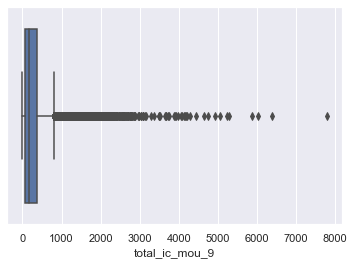

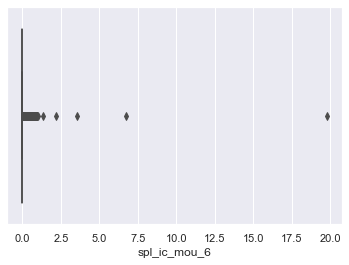

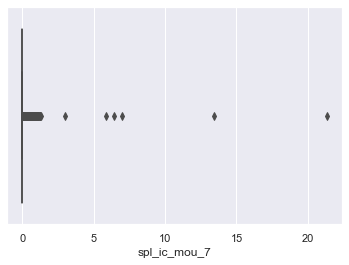

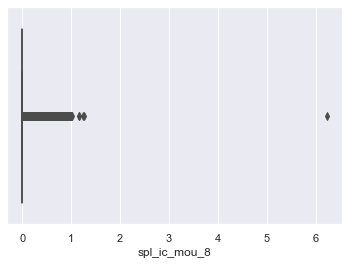

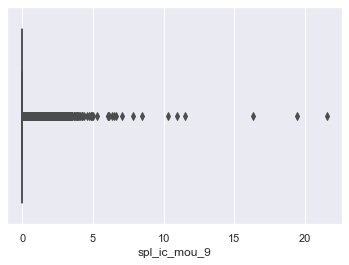

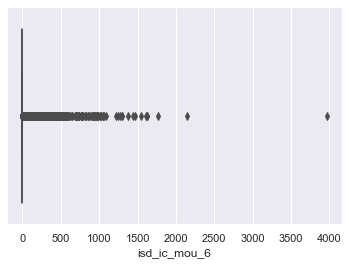

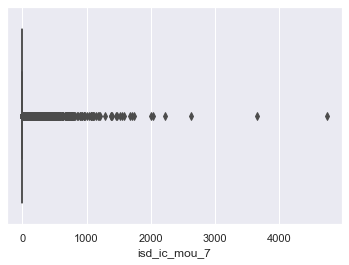

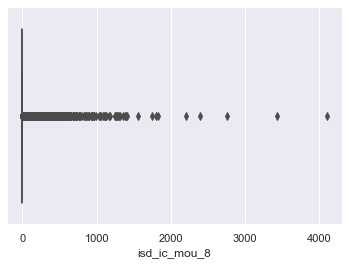

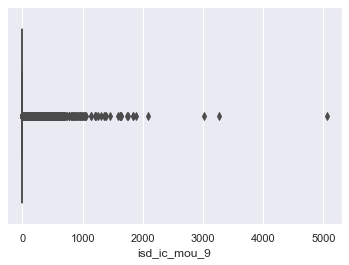

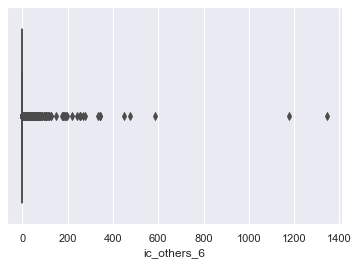

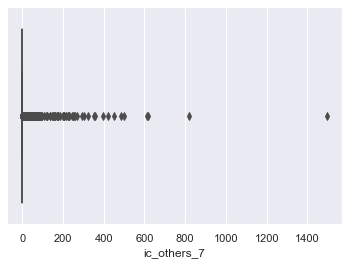

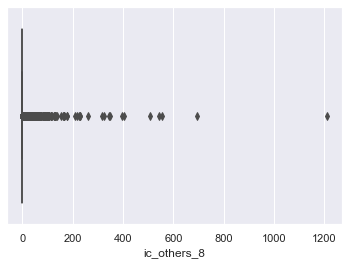

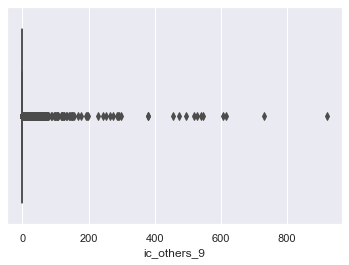

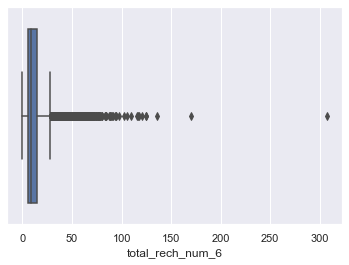

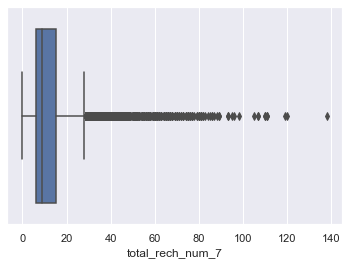

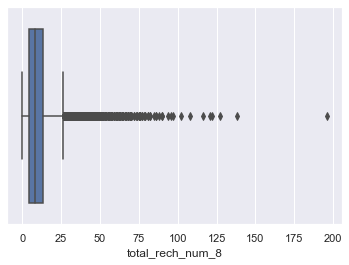

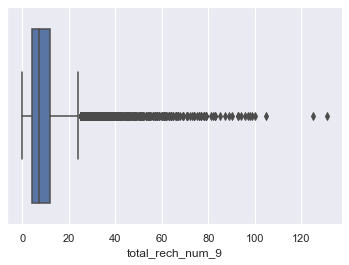

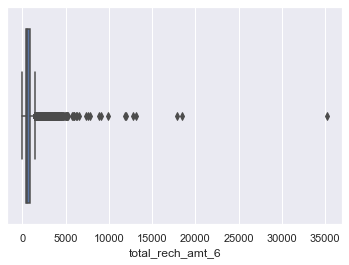

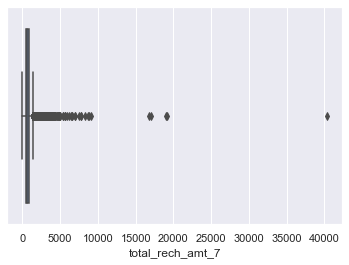

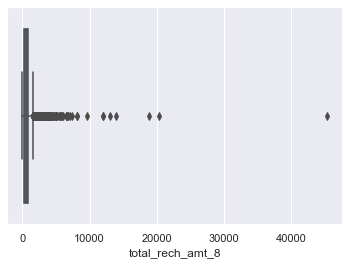

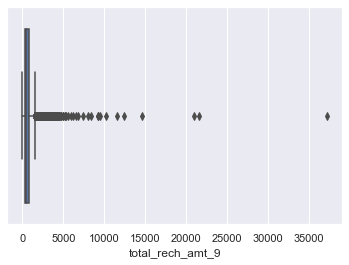

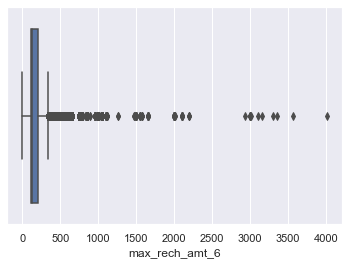

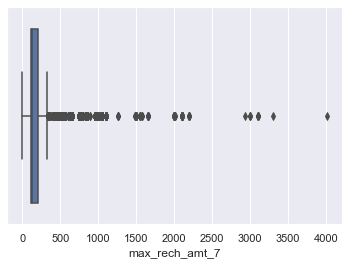

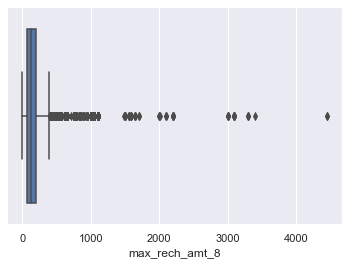

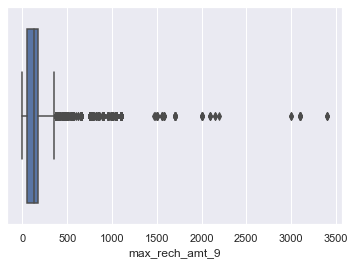

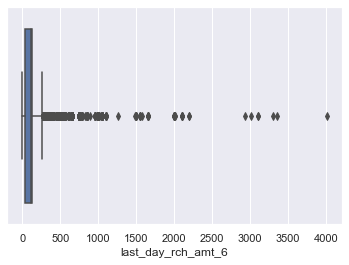

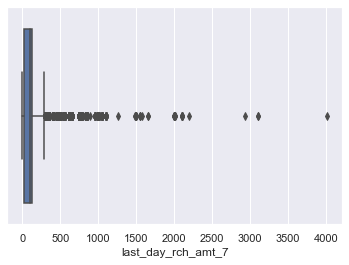

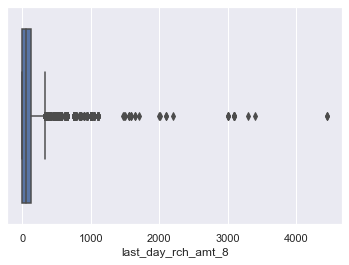

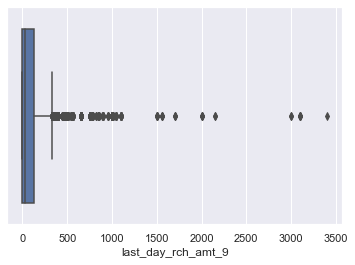

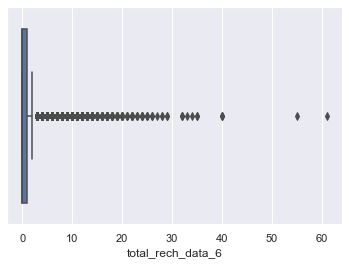

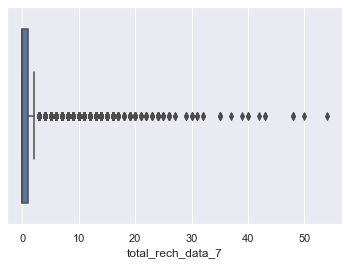

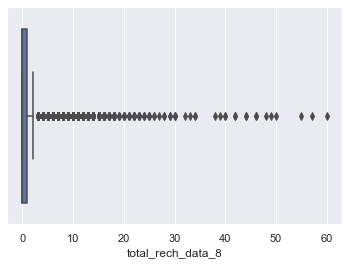

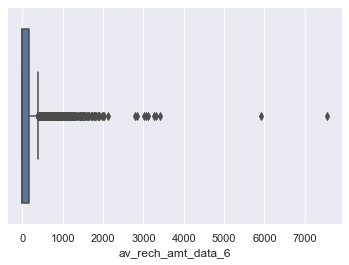

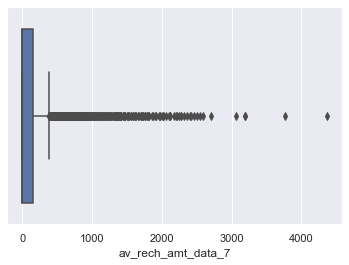

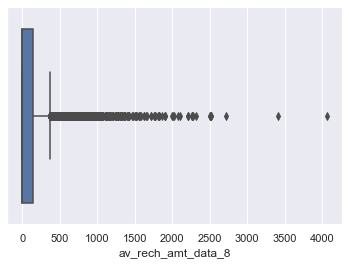

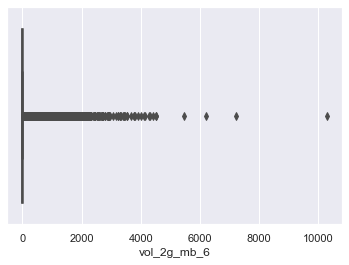

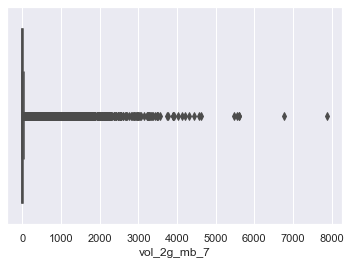

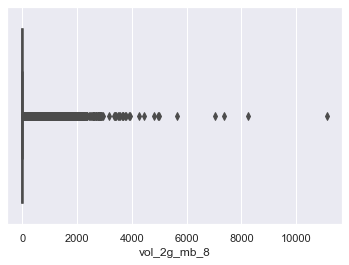

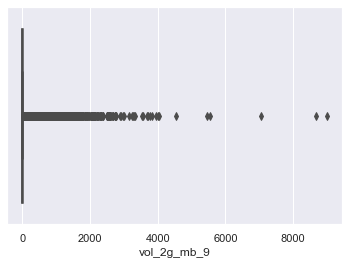

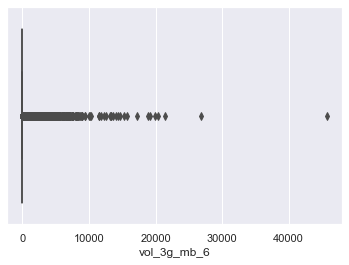

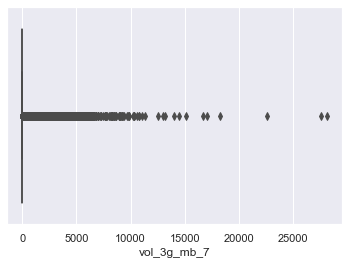

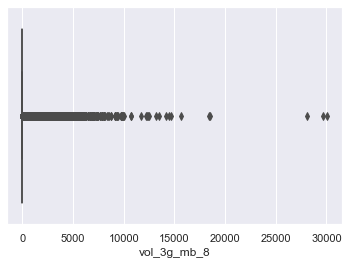

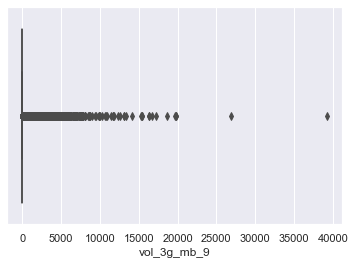

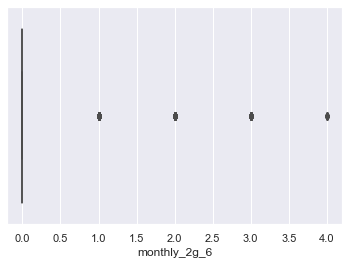

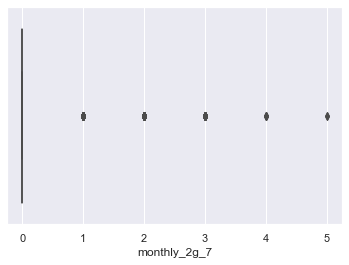

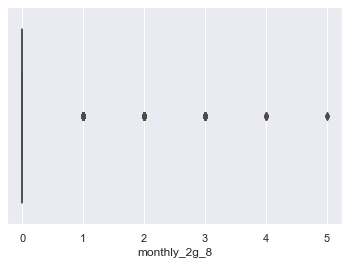

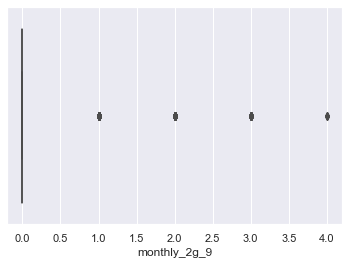

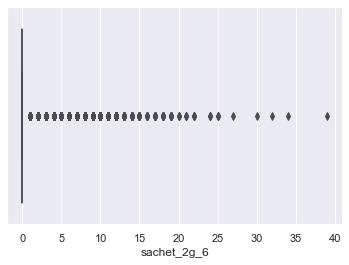

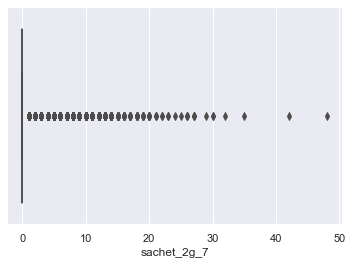

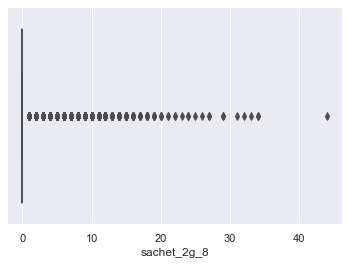

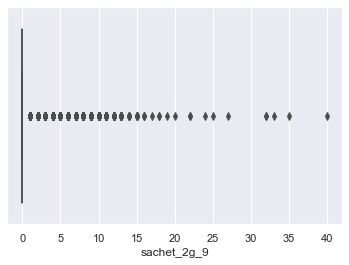

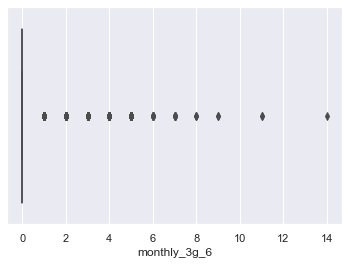

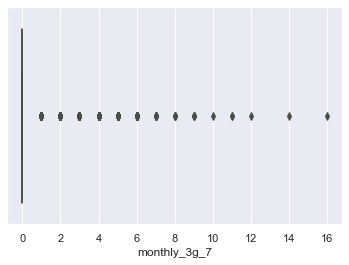

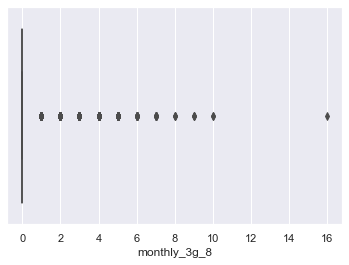

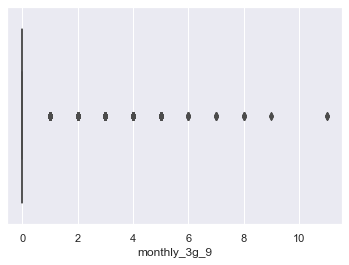

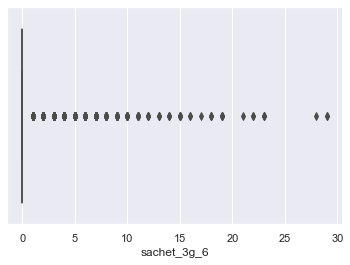

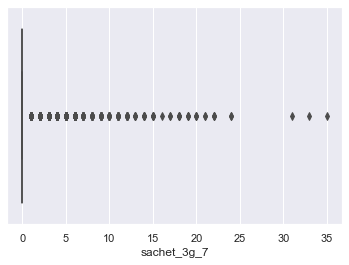

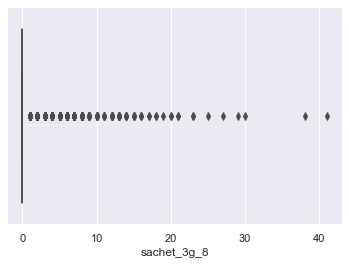

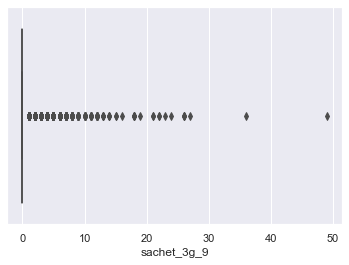

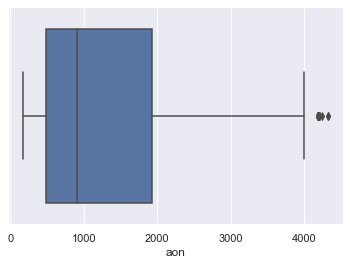

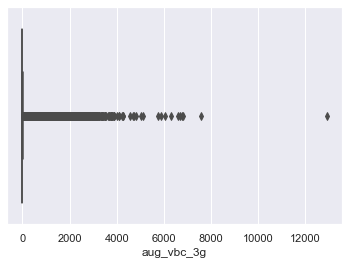

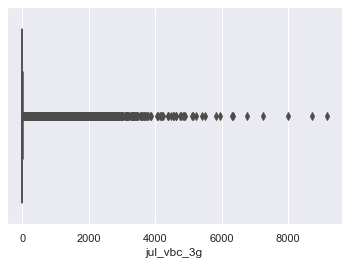

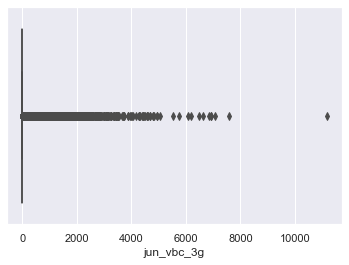

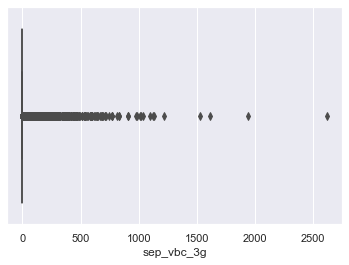

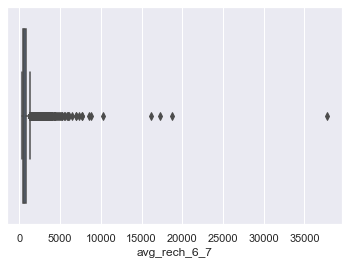

In [39]:
# Box-blot for outlier checking

plt.figure()

for i, col in enumerate (tel_numeric.columns):
    plt.figure(i)
    sns.boxplot(tel[col])

In [40]:
tel.shape

(30011, 188)

In [41]:
#Capping the outliers

for i in tel_numeric:
    tel[i] = np.where(tel[i] > tel[i].quantile(0.95), tel[i].quantile(0.95), tel[i])
    tel[i] = np.where(tel[i] < tel[i].quantile(0.01), tel[i].quantile(0.01), tel[i])

In [42]:
tel.shape

(30011, 188)

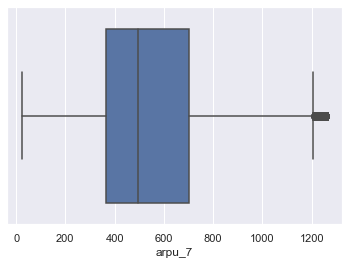

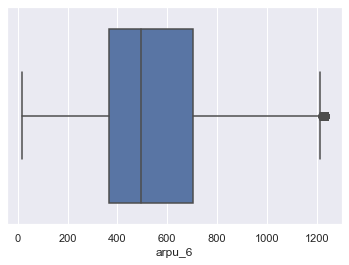

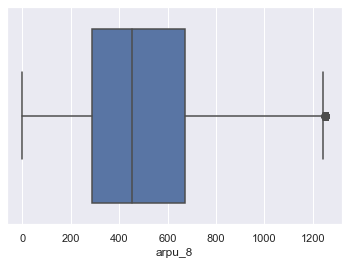

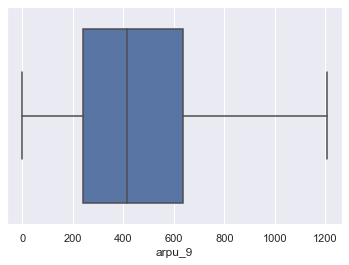

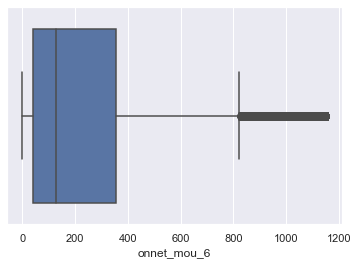

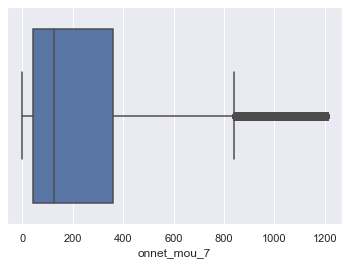

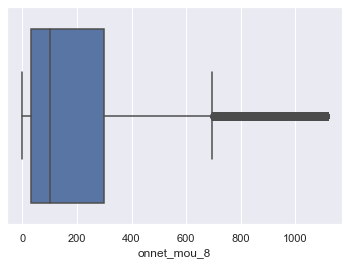

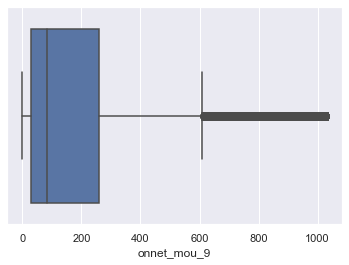

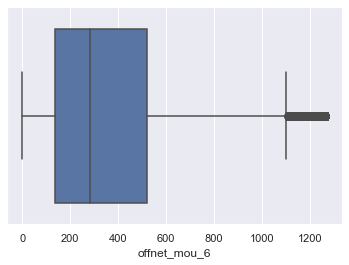

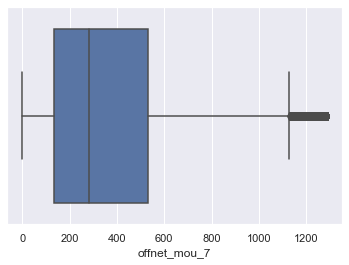

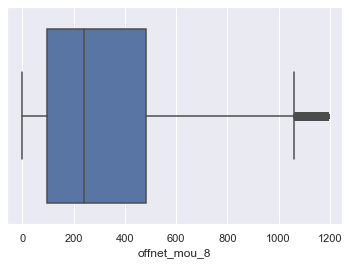

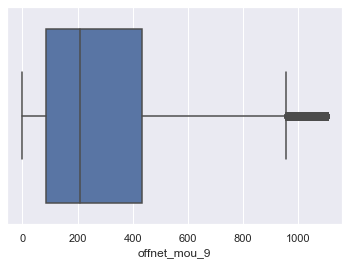

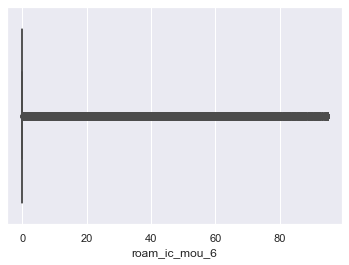

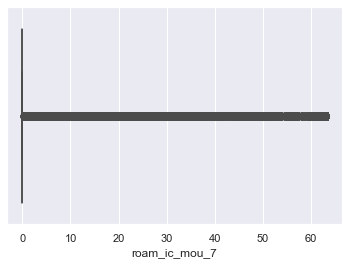

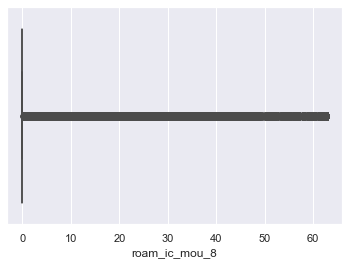

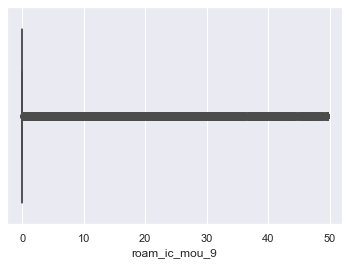

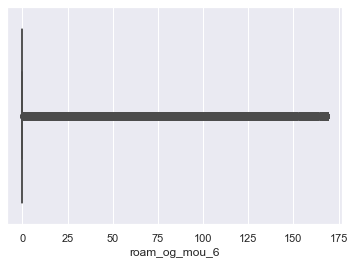

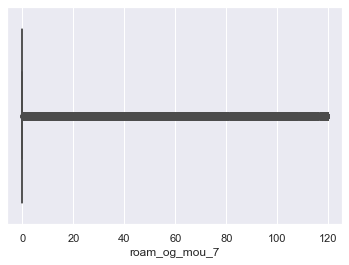

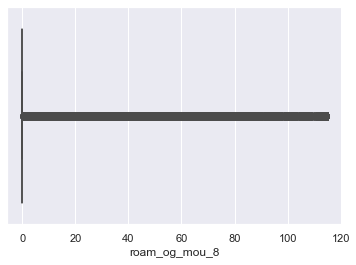

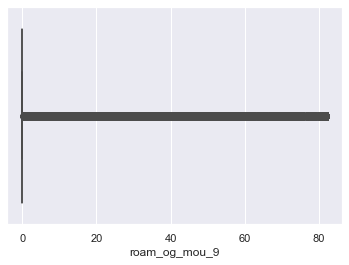

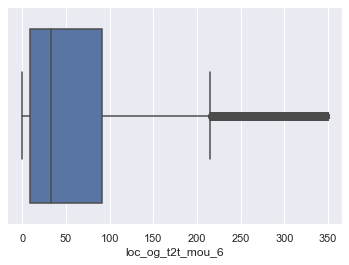

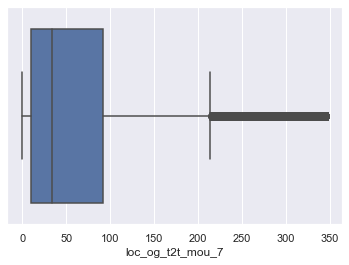

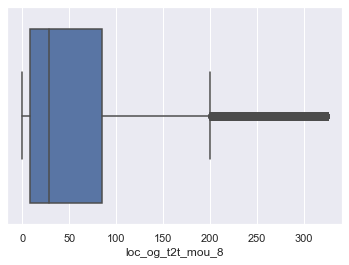

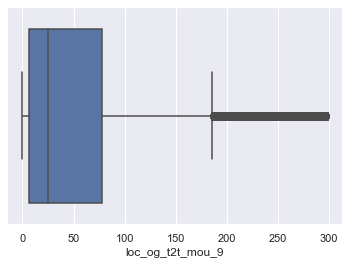

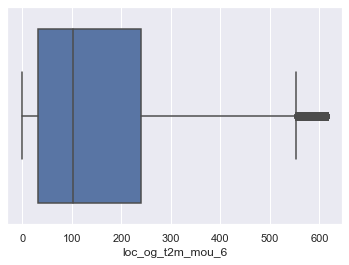

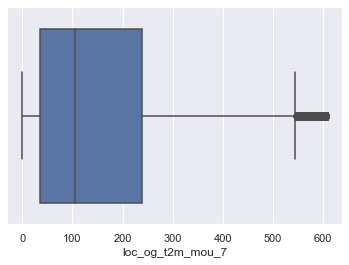

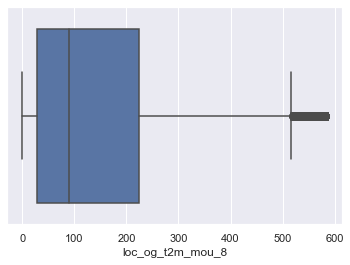

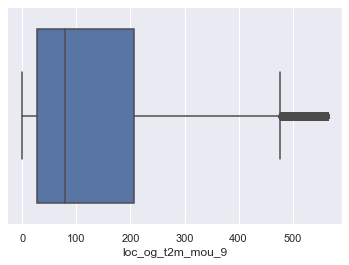

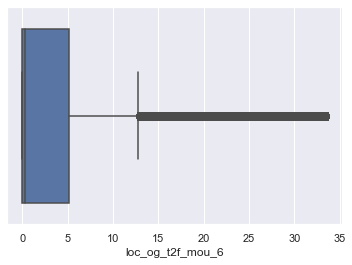

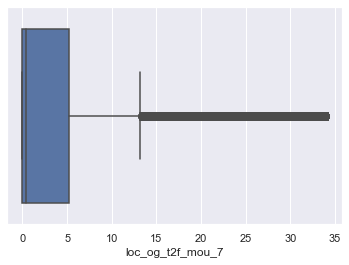

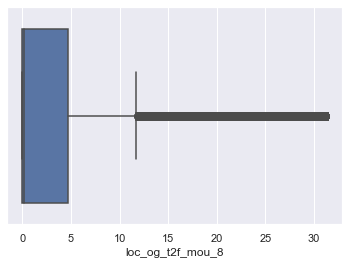

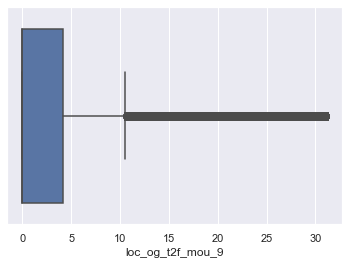

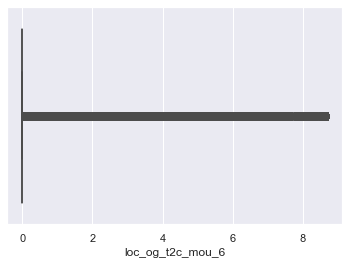

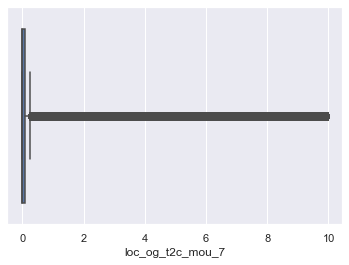

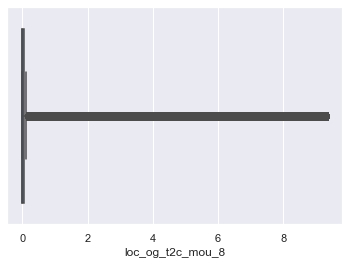

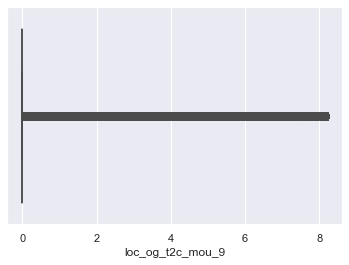

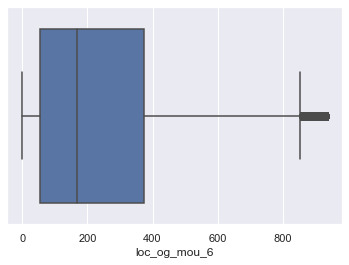

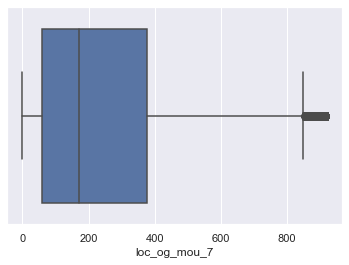

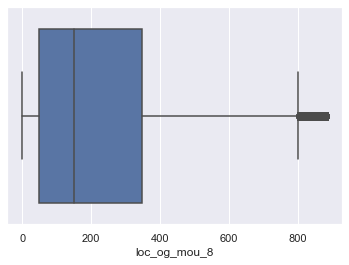

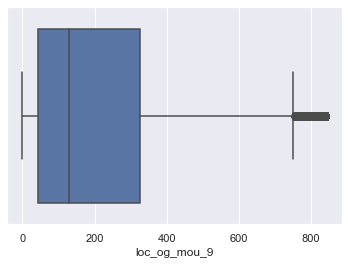

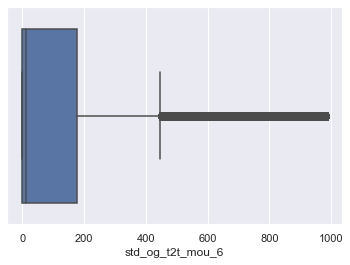

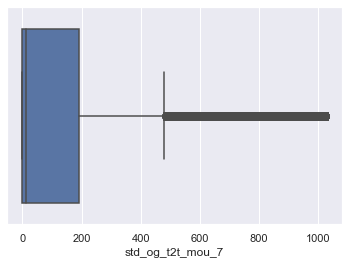

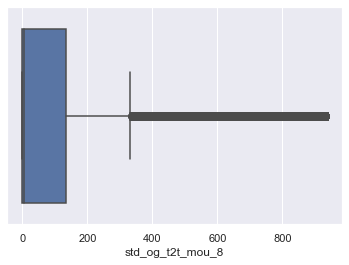

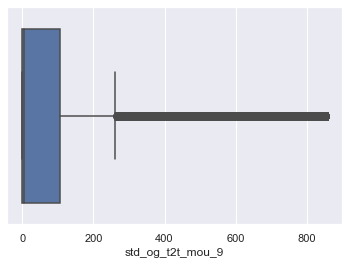

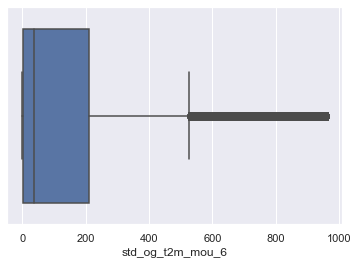

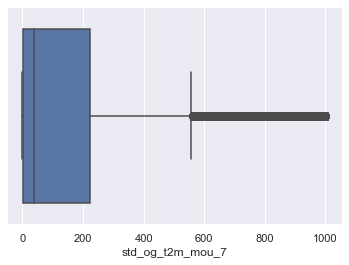

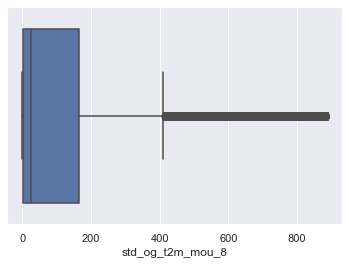

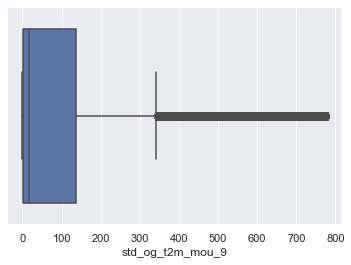

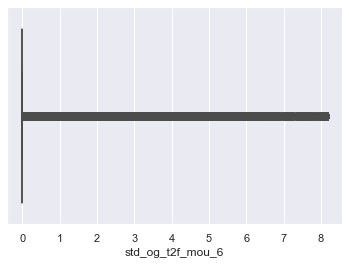

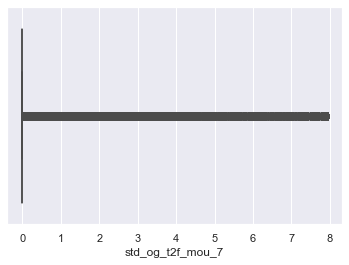

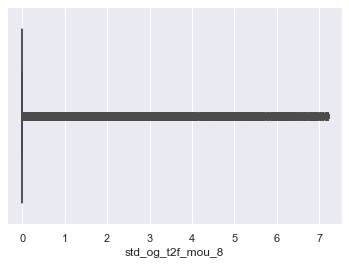

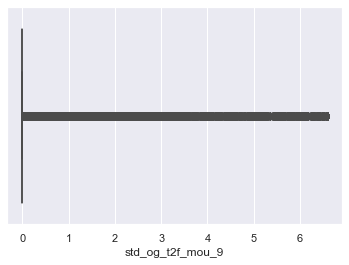

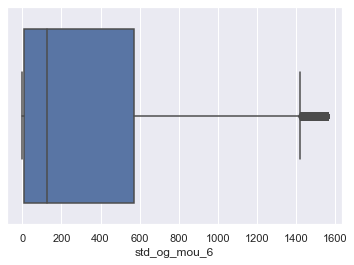

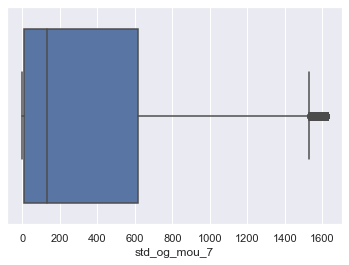

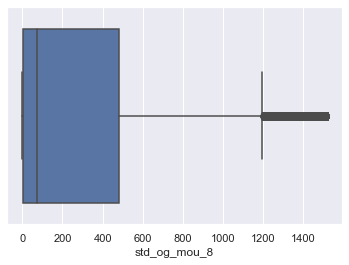

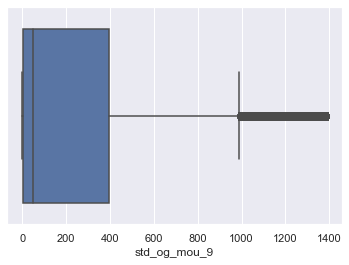

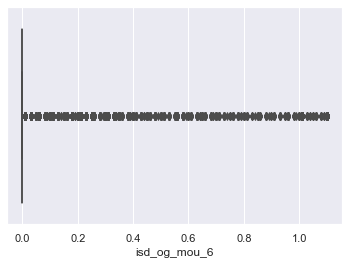

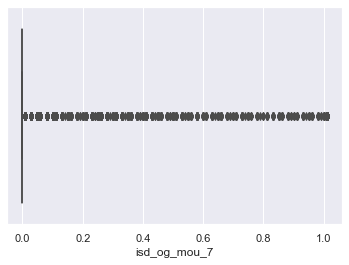

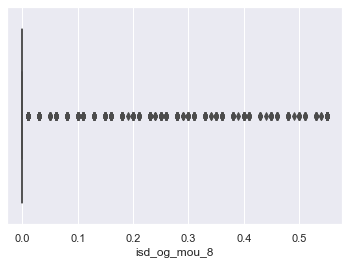

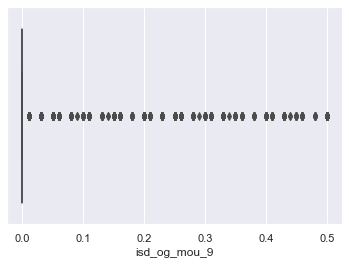

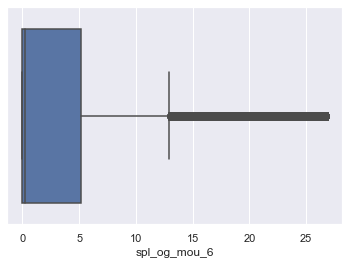

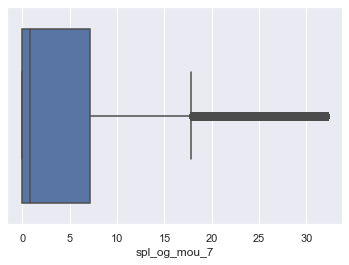

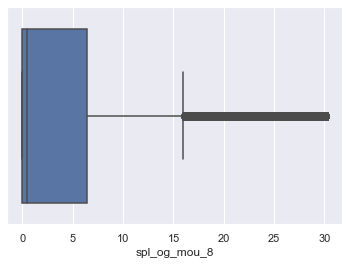

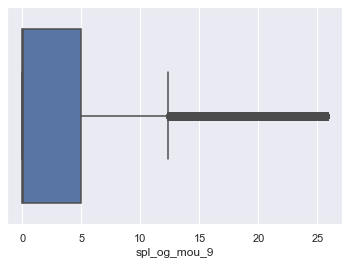

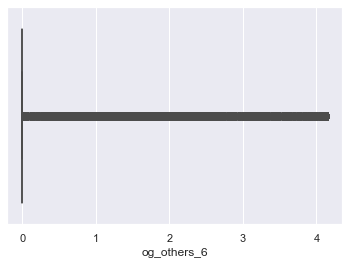

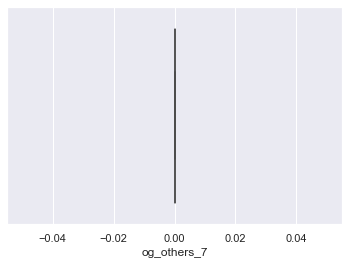

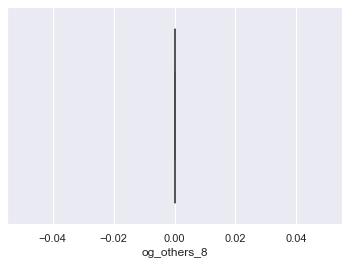

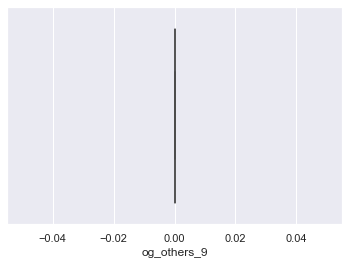

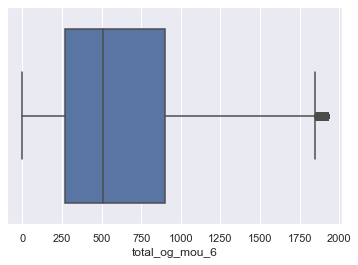

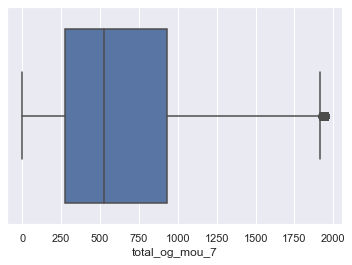

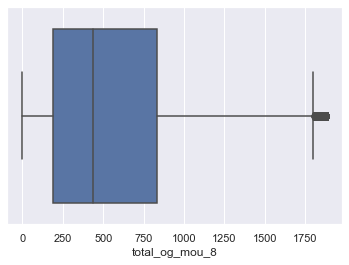

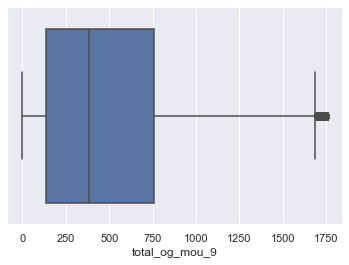

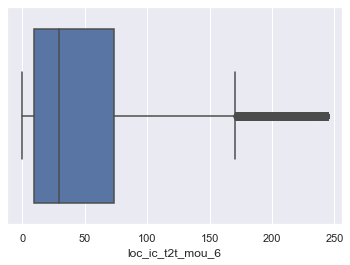

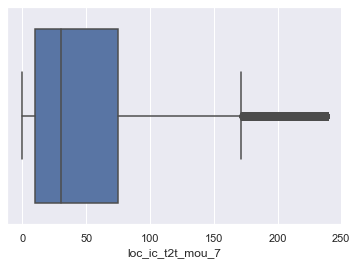

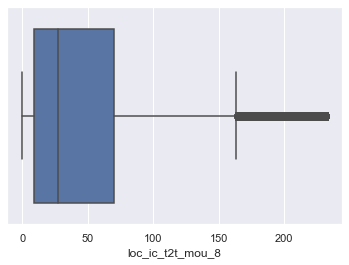

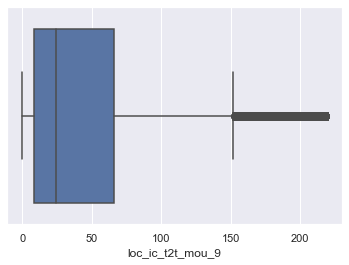

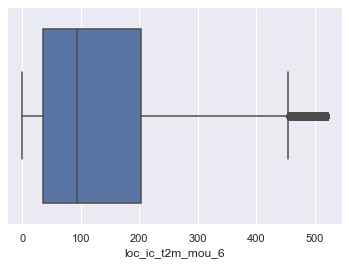

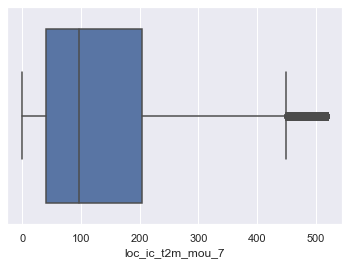

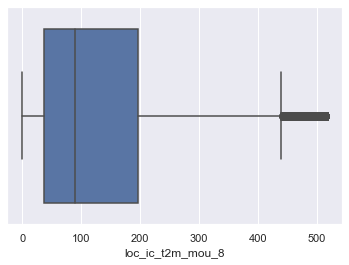

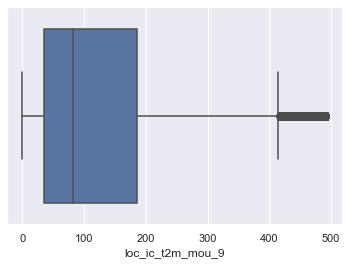

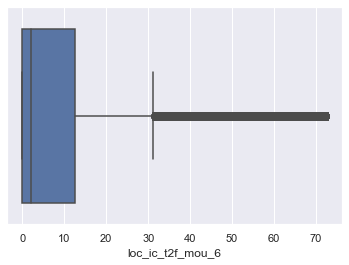

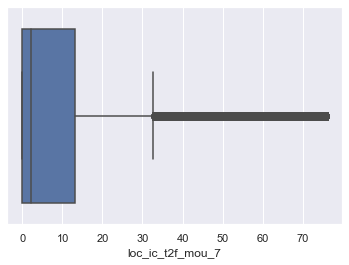

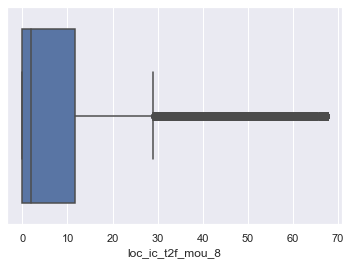

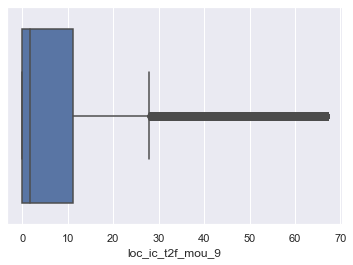

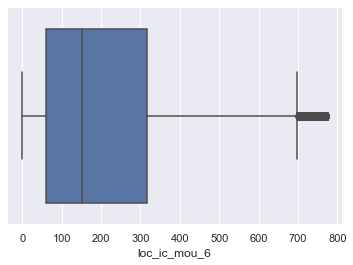

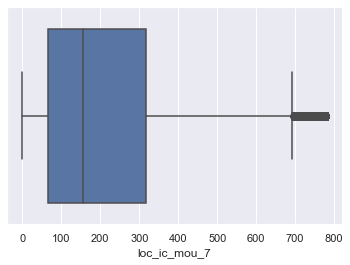

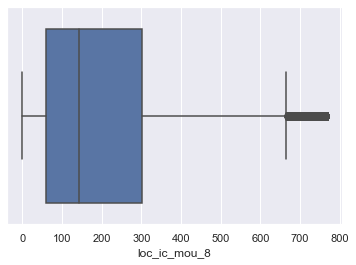

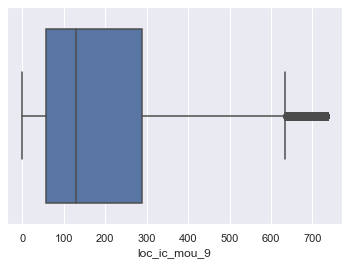

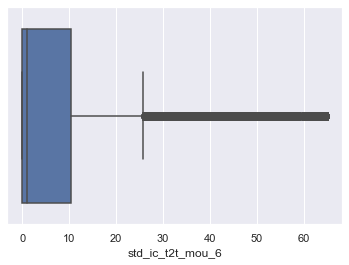

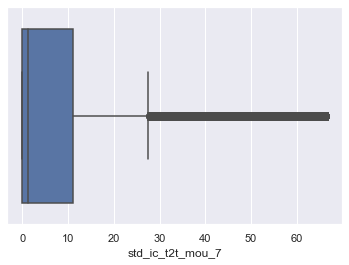

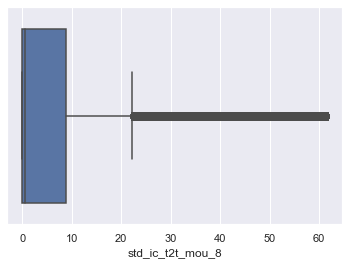

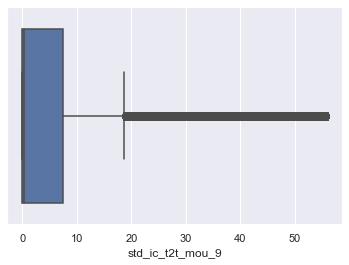

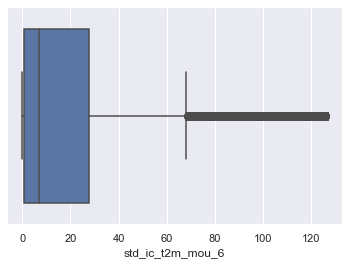

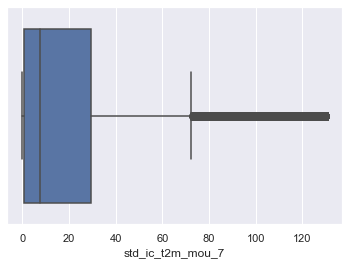

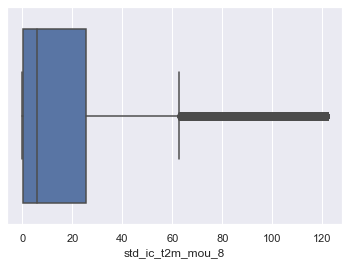

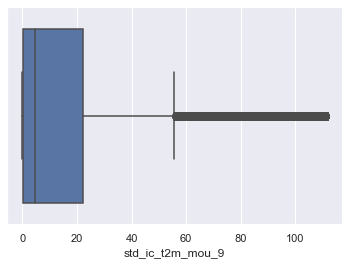

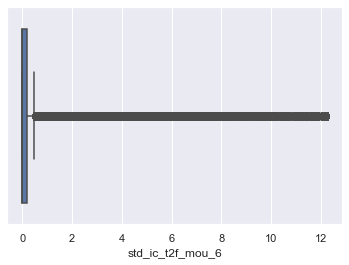

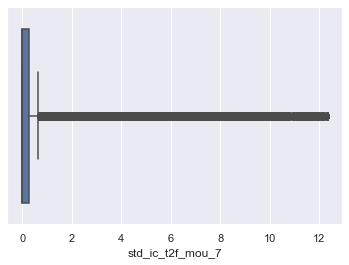

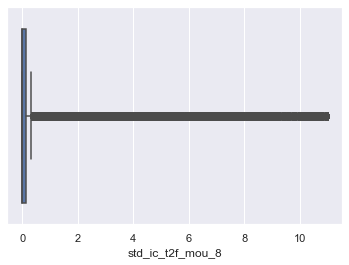

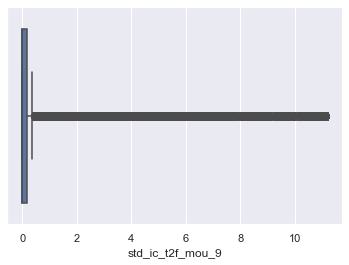

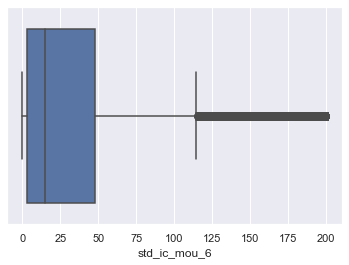

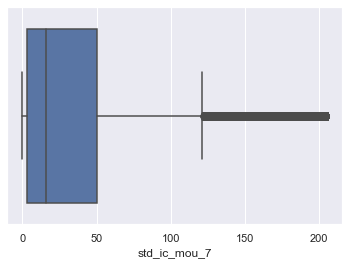

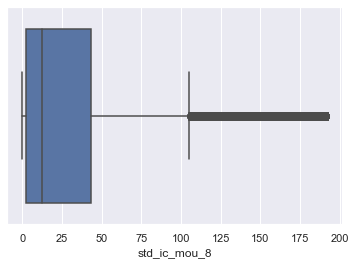

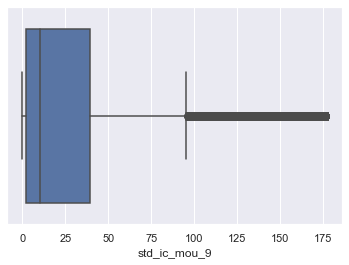

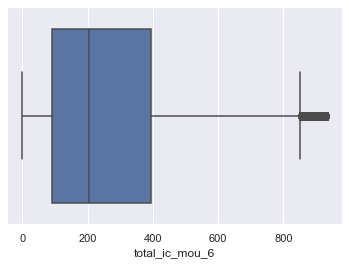

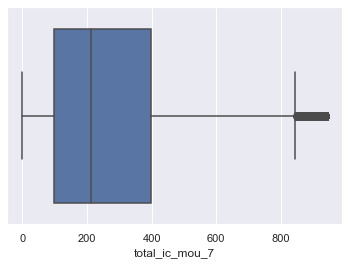

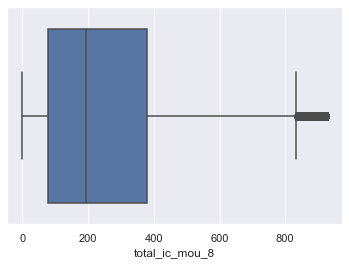

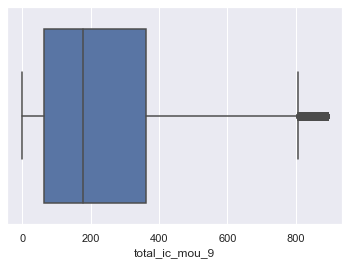

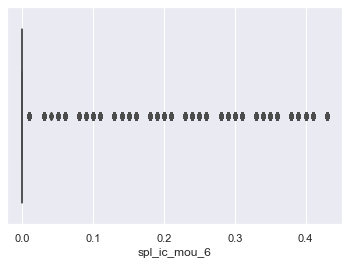

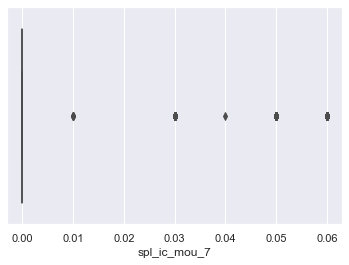

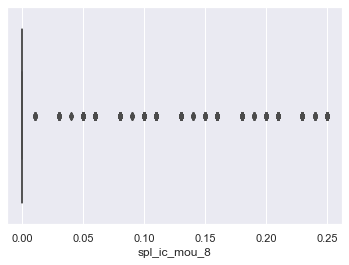

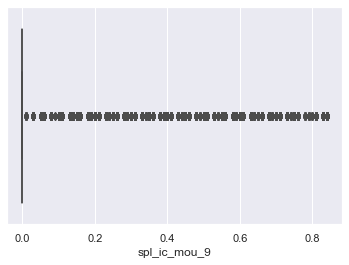

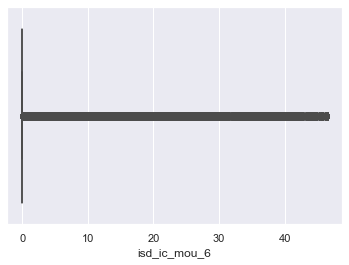

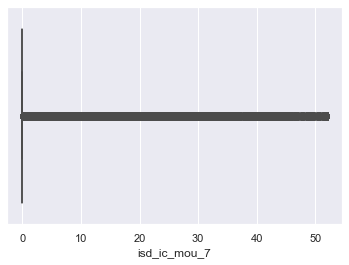

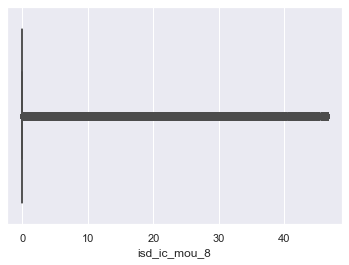

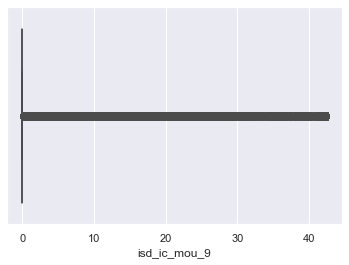

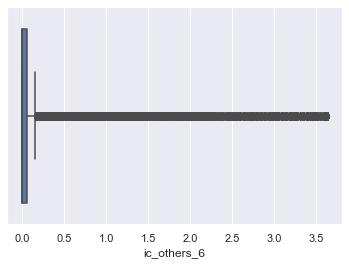

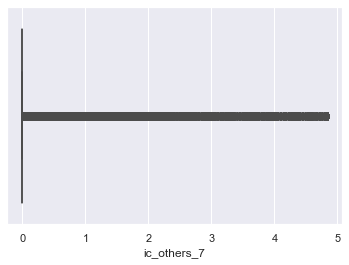

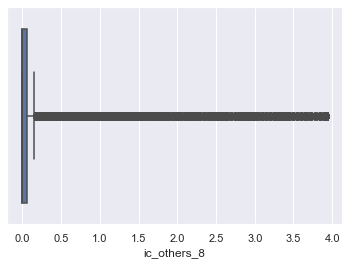

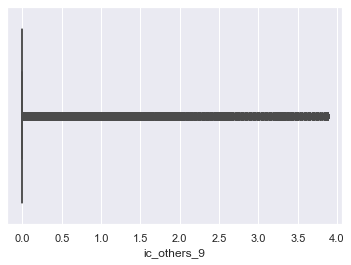

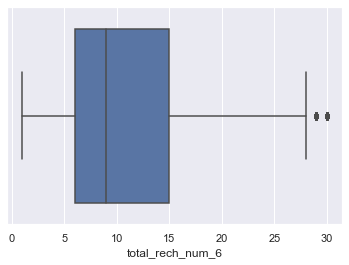

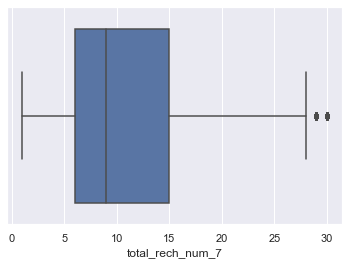

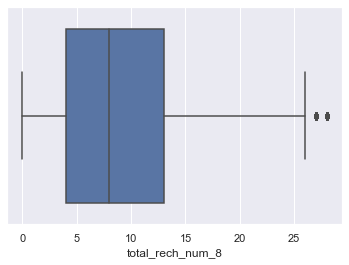

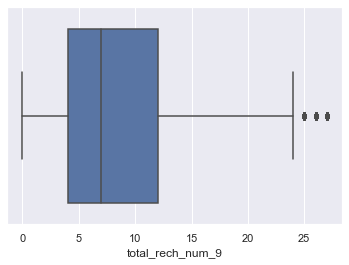

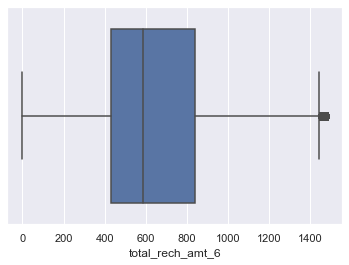

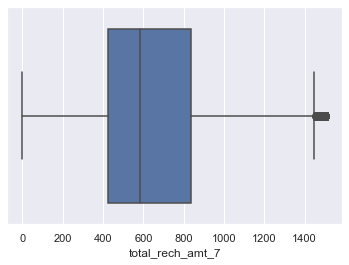

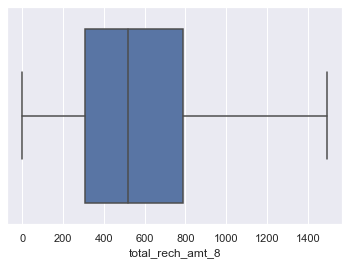

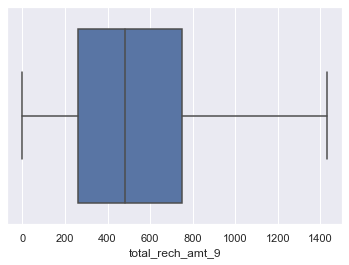

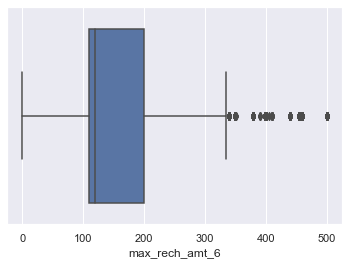

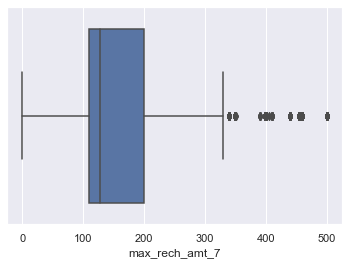

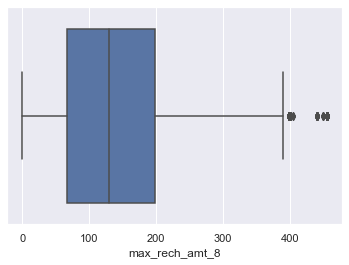

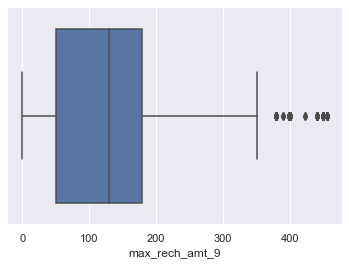

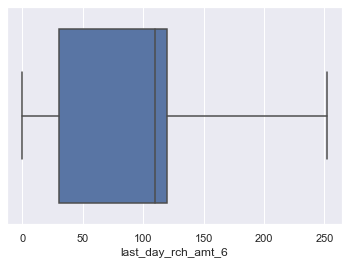

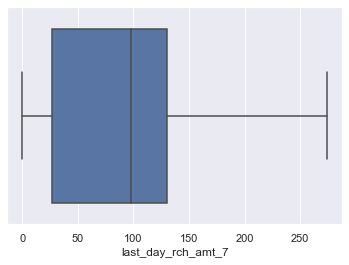

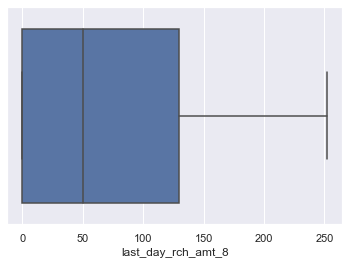

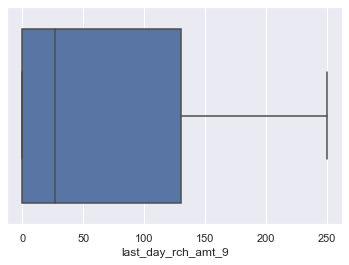

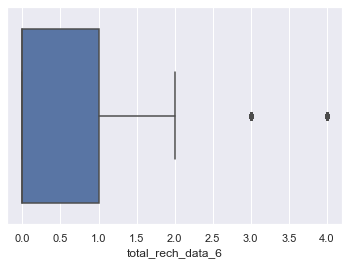

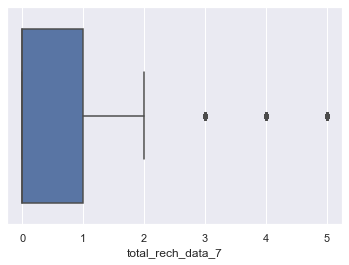

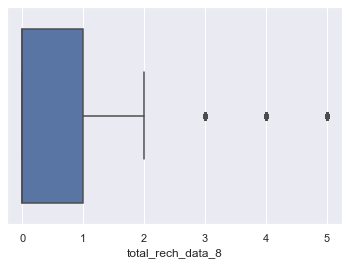

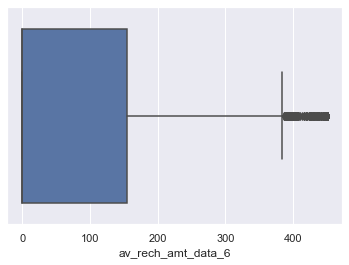

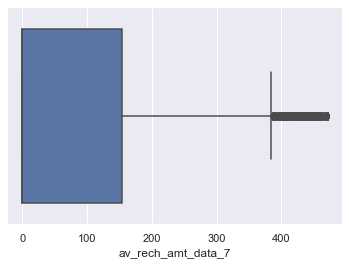

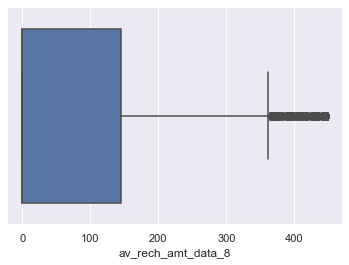

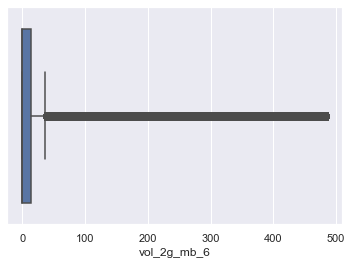

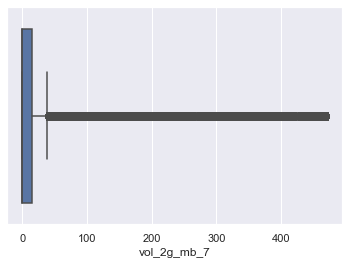

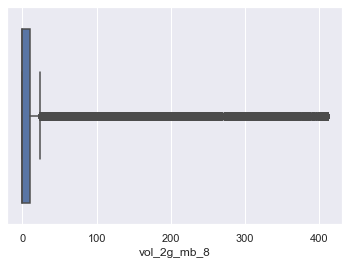

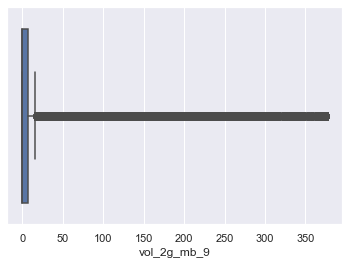

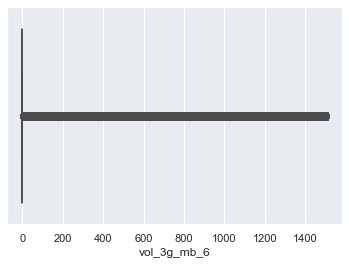

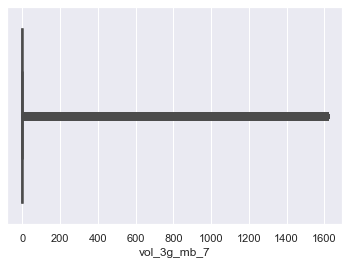

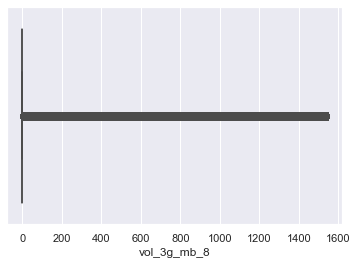

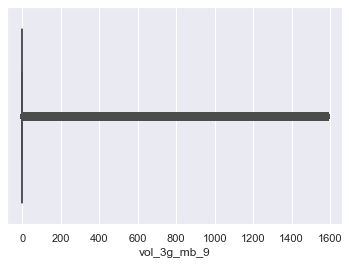

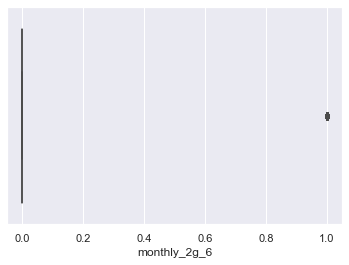

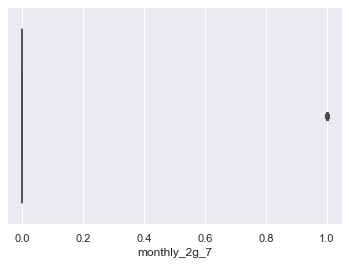

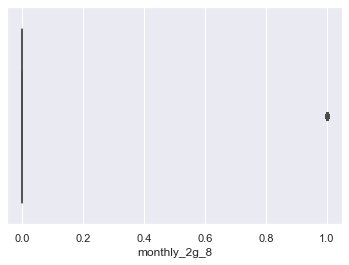

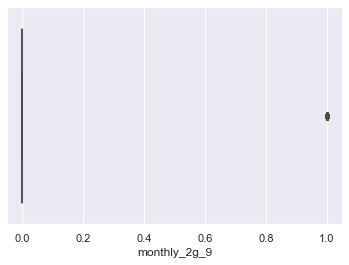

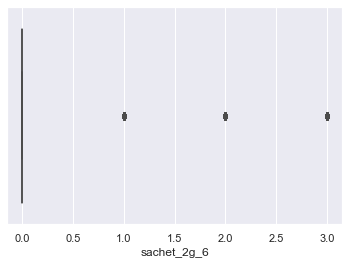

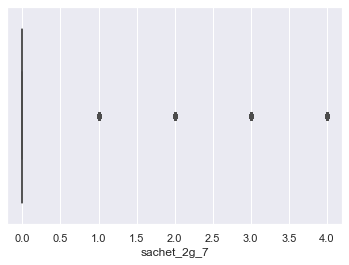

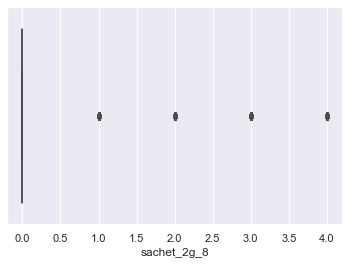

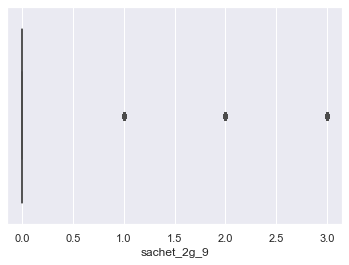

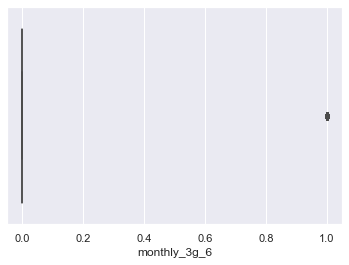

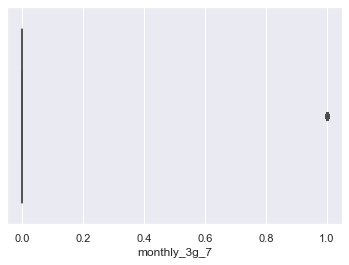

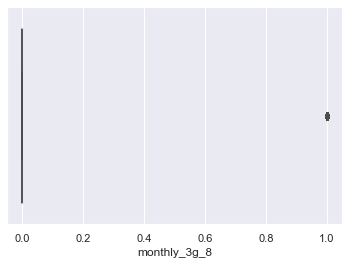

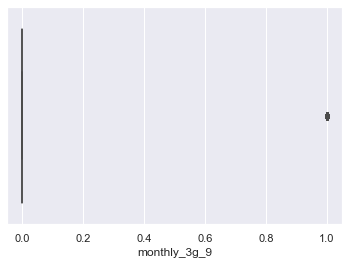

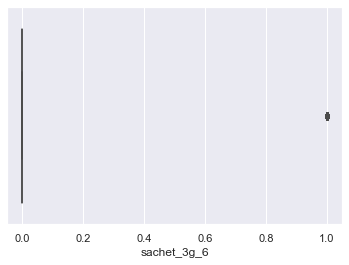

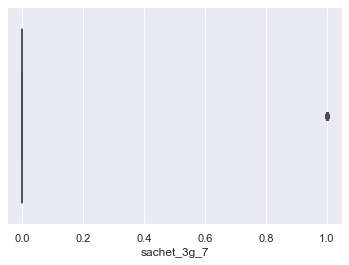

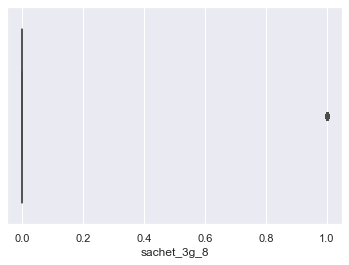

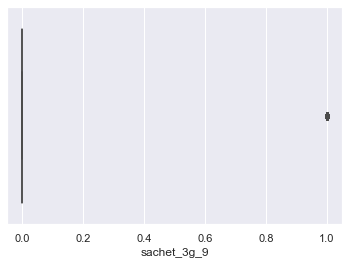

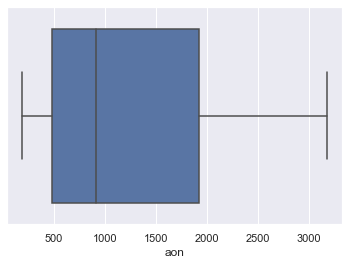

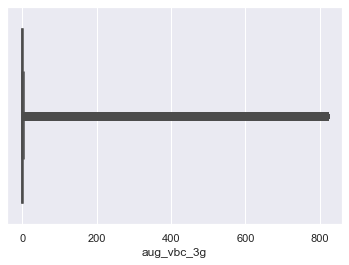

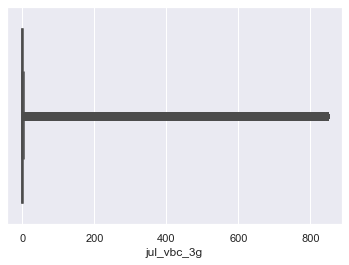

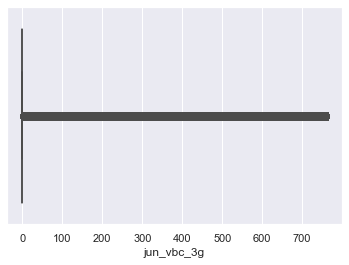

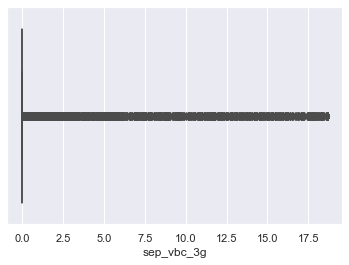

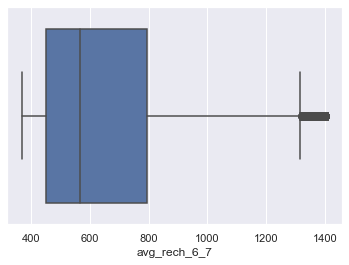

In [43]:
# Re-checking the outliers

plt.figure()

for i, col in enumerate (tel_numeric.columns):
    plt.figure(i)
    sns.boxplot(tel[col])

*** Reamining Missing value Treatment ***

In [44]:
#Statistical Summary

tel.describe()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,night_pck_user_9_0.0,night_pck_user_9_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0,fb_user_9_0.0,fb_user_9_1.0,avg_rech_6_7
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.0,30011.0,30011.0,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.0000

In [45]:
# This columns are completely filled with one value so will drop them

empty_list =  ['og_others_9','og_others_8','og_others_7']

tel = tel.drop(empty_list, axis =1)

## 5. Derive Churn

In [46]:
tel.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,night_pck_user_9_0.0,night_pck_user_9_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0,fb_user_9_0.0,fb_user_9_1.0,avg_rech_6_7
7,1069.180,1261.4215,1258.5555,500.000,57.84,54.68,52.29,29.84,453.43,567.160,325.91,87.29,16.23,33.490,31.640,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,11.26,308.63,447.38,162.28,39.12,33.595,34.085,31.31,0.00,0.0,0.0,0.00,0.0,422.16,533.91,255.79,61.84,4.300,23.29,12.01,0.00,49.89,31.76,49.14,2.50,6.66,7.92,7.18,0.00,60.86,75.14,77.84,8.41,0.0,0.18,0.55,0.0,4.50,0.00,6.50,0.00,0.00,487.53,609.24,350.16,0.00,58.14,32.26,27.31,15.66,217.56,221.49,121.19,56.61,72.61,76.045,39.53,0.96,427.88,355.23,188.04,91.64,36.890,11.83,30.39,0.00,91.44,126.99,121.875,1.740,12.24,12.31,10.98,0.0,180.54,173.08,191.955,5.38,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.060,14.530,31.590,0.00,3.63,4.83,3.93,0.00,5.0,5.0,7.0,3.0,1480.0,790.0,1494.0,0.0,500.0,500.0,455.0,0.0,0.0,0.0,252.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.380,18.74,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1185.0
8,378.721,492.2230,137.3620,166.787,413.69,351.03,35.08,33.46,94.66,80.630,136.48,108.71,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.000,0.000,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.560,133.43,22.58,7.33,13.69,10.

In [47]:
# since we have filtered out the data we dont need avg reach for month 6 and 7

tel.drop('avg_rech_6_7', axis = 1, inplace = True)

In [48]:
# If both the calling minutes and data usage is 0: then we can imply they are churn 

#Creating usage column based on month 9

tel['usage_sum_9'] = tel['total_og_mou_9'] + tel['total_ic_mou_9'] + tel['vol_2g_mb_9'] + tel['vol_3g_mb_9']

In [49]:
# Creating the churn column

tel['churn']  = tel['usage_sum_9']
tel['churn'] = tel['churn'].apply(lambda x : 0 if x >= 1 else 1)
tel.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,night_pck_user_9_0.0,night_pck_user_9_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0,fb_user_9_0.0,fb_user_9_1.0,usage_sum_9,churn
7,1069.180,1261.4215,1258.5555,500.000,57.84,54.68,52.29,29.84,453.43,567.160,325.91,87.29,16.23,33.490,31.640,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,11.26,308.63,447.38,162.28,39.12,33.595,34.085,31.31,0.00,0.0,0.0,0.00,0.0,422.16,533.91,255.79,61.84,4.300,23.29,12.01,0.00,49.89,31.76,49.14,2.50,6.66,7.92,7.18,0.00,60.86,75.14,77.84,8.41,0.0,0.18,0.55,0.0,4.50,0.00,6.50,0.00,0.00,487.53,609.24,350.16,0.00,58.14,32.26,27.31,15.66,217.56,221.49,121.19,56.61,72.61,76.045,39.53,0.96,427.88,355.23,188.04,91.64,36.890,11.83,30.39,0.00,91.44,126.99,121.875,1.740,12.24,12.31,10.98,0.0,180.54,173.08,191.955,5.38,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.060,14.530,31.590,0.00,3.63,4.83,3.93,0.00,5.0,5.0,7.0,3.0,1480.0,790.0,1494.0,0.0,500.0,500.0,455.0,0.0,0.0,0.0,252.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.380,18.74,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,1
8,378.721,492.2230,137.3620,166.787,413.69,351.03,35.08,33.46,94.66,80.630,136.48,108.71,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.000,0.000,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.560,133.43,22.58,7.33,13.6

In [50]:
#Since we have derived the churn we dont need usage_sum_9

tel.drop('usage_sum_9', axis =1, inplace = True)

In [51]:
# Lets look into churn rate

print("Churn Customers: {}".format(sum(tel['churn']==1)))
print("Non-Churn Customers: {} ".format(sum(tel['churn']==0)))
print("Churn Rate : {}% ".format(round(sum(tel['churn']==1)/len(tel['churn'])*100,2)))

Churn Customers: 2644
Non-Churn Customers: 27367 
Churn Rate : 8.81% 


## 6. EDA

In [52]:
churn_lst = pd.DataFrame(tel['churn'].value_counts())
total_people = churn_lst['churn'].sum()
churn_lst['Churn_Percentage'] = round(100*(churn_lst['churn']/total_people), 2)
churn_lst.head(2)

,churn,Churn_Percentage
0,27367,91.19
1,2644,8.81


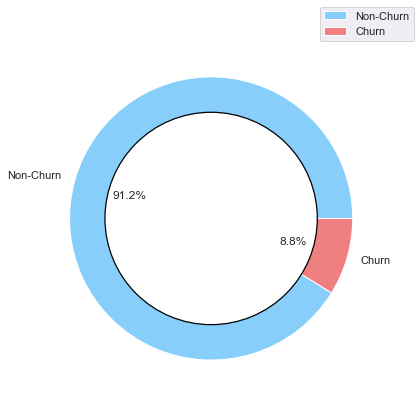

In [53]:
#Plotting Donut chart

plt.figure(figsize = (6,6))

colors = ['lightskyblue', 'lightcoral'] 

plt.pie(churn_lst['Churn_Percentage'], labels = ['Non-Churn', 'Churn'], colors = colors, autopct='%1.1f%%')
centre_circle = plt.Circle((0,0), 0.75, color = 'black', fc= 'white', linewidth = 1.25)

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.legend(loc = 'center',bbox_to_anchor=(1,1))

plt.tight_layout()

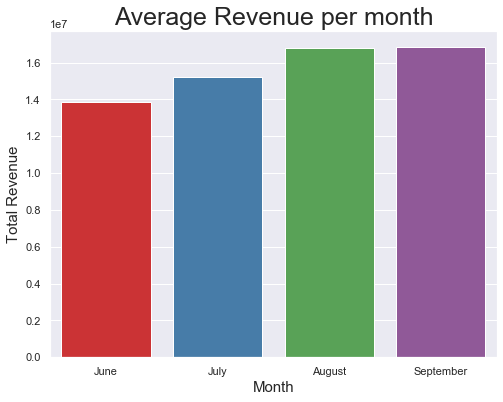

In [54]:
# What the average revenue per user for month 6,7, 8 & 9?

plt.figure(figsize = (8,6))

a = tel['arpu_6'].sum()
b = tel['arpu_7'].sum()
c = tel['arpu_8'].sum()
d = tel['arpu_9'].sum()

x = [a,b,c,d]
y = [a,b,c,d]

sns.barplot(x,y, palette = "Set1")

plt.title('Average Revenue per month', fontsize = 25)
plt.ylabel('Total Revenue', fontsize = 15)
plt.xlabel('Month', fontsize = 15)
plt.xticks([0, 1, 2, 3], ['June', 'July', 'August','September'])
plt.show()

We can see that all months have good average revenue and it it linearly increasing 

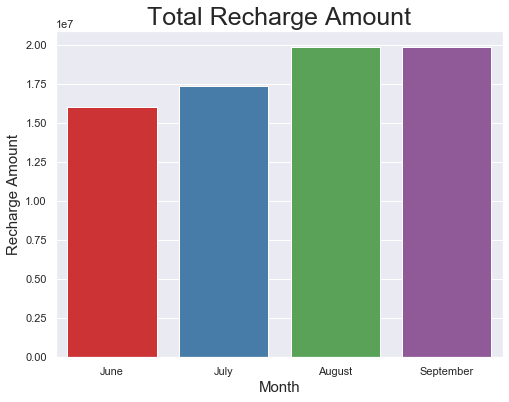

In [55]:
#Plotting graph for recahrge amount

plt.figure(figsize = (8,6))

a = tel['total_rech_amt_6'].sum()
b = tel['total_rech_amt_7'].sum()
c = tel['total_rech_amt_8'].sum()
d = tel['total_rech_amt_9'].sum()


x = [a,b,c,d]
y = [a,b,c,d]

sns.barplot(x,y, palette = "Set1")

plt.title('Total Recharge Amount', fontsize = 25)
plt.ylabel('Recharge Amount', fontsize = 15)
plt.xlabel('Month', fontsize = 15)
plt.xticks([0, 1, 2, 3], ['June', 'July', 'August','September'])
plt.show()

Recharge done also increases in linear fashion

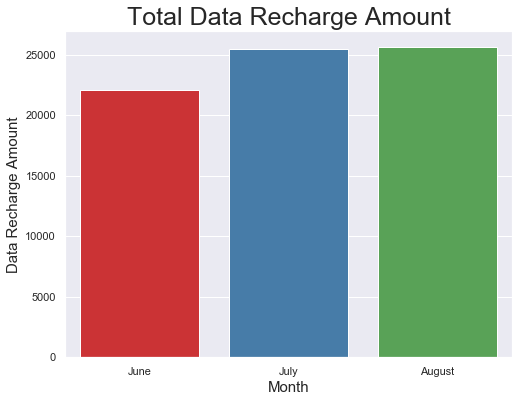

In [56]:
#Plotting graph for data recahrge amount

plt.figure(figsize = (8,6))

a = tel['total_rech_data_6'].sum()
b = tel['total_rech_data_7'].sum()
c = tel['total_rech_data_8'].sum()


x = [a,b,c]
y = [a,b,c]

sns.barplot(x,y, palette = "Set1")

plt.title('Total Data Recharge Amount', fontsize = 25)
plt.ylabel('Data Recharge Amount', fontsize = 15)
plt.xlabel('Month', fontsize = 15)
plt.xticks([0, 1, 2], ['June', 'July', 'August'])
plt.show()

 June has the lowest Data recharge amd there is consitent data recharge for the month of July and August
 

<Figure size 720x720 with 0 Axes>

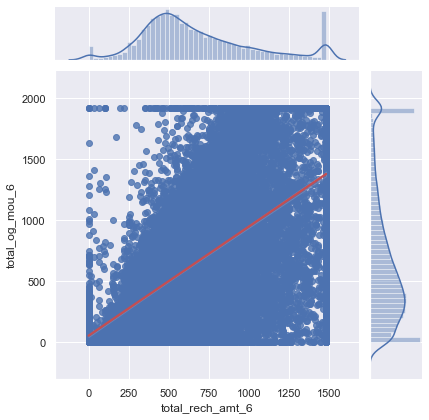

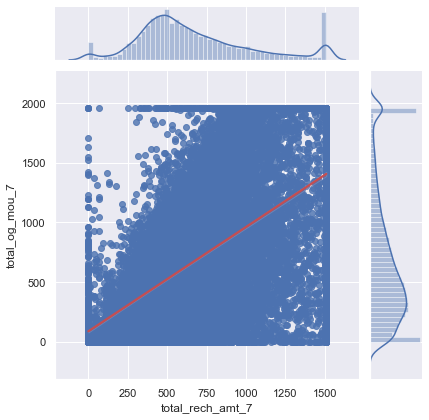

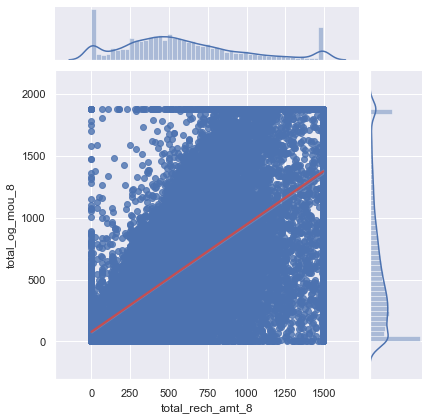

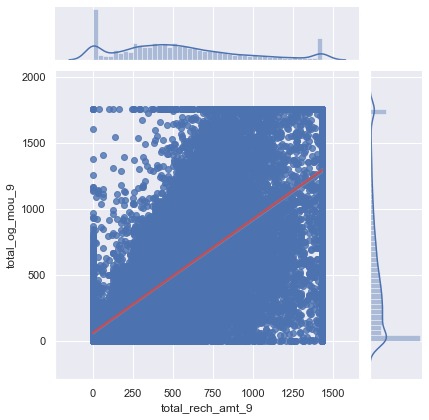

In [57]:
#Plotting joint plot to see if there is some relationship

plt.figure(figsize = (10,10))

plt.subplot = (4,1,1)
sns.jointplot(x = 'total_rech_amt_6', y = 'total_og_mou_6', data = tel, kind='reg',
                  joint_kws={'line_kws':{'color':'r'}})


plt.subplot = (4,1,2)
sns.jointplot(x = 'total_rech_amt_7', y = 'total_og_mou_7', data = tel, kind='reg',
                  joint_kws={'line_kws':{'color':'r'}})

plt.subplot = (4,1,3)
sns.jointplot(x = 'total_rech_amt_8', y = 'total_og_mou_8', data = tel, kind='reg',
                  joint_kws={'line_kws':{'color':'r'}})

plt.subplot = (4,1,4)
sns.jointplot(x = 'total_rech_amt_9', y = 'total_og_mou_9', data = tel, kind='reg',
                  joint_kws={'line_kws':{'color':'r'}})

plt.show()

From the above graph we can see that there is linear relation ship for total recharge and total out going call for all the months

In [58]:
#Dropping all the columns which correspond to month 9

mon_9 = []

for col in tel.columns:
    if '9' in col:
        mon_9.append(col)
        
mon_9.append('sep_vbc_3g')

In [59]:
# Creating main dataframe on whihc we are going to do modelling

tel_df = tel.drop(mon_9, axis = 1)
tel_df.reset_index(drop = True, inplace = True)
tel_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0,churn
0,1069.180,1261.4215,1258.5555,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.490,31.640,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,33.595,34.085,31.31,0.0,0.0,0.00,422.16,533.91,255.79,4.300,23.29,12.01,49.89,31.76,49.14,6.66,7.92,7.18,60.86,75.14,77.84,0.0,0.18,0.55,4.50,0.00,6.50,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,72.61,76.045,39.53,427.88,355.23,188.04,36.890,11.83,30.39,91.44,126.99,121.875,12.24,12.31,10.98,180.54,173.08,191.955,626.46,558.04,428.74,0.21,0.0,0.0,2.060,14.530,31.590,3.63,4.83,3.93,5.0,5.0,7.0,1480.0,790.0,1494.0,500.0,500.0,455.0,0.0,0.0,252.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.380,18.74,0,0,0,0,0,0,0,0,0,0,0,0,1
1,378.721,492.2230,137.3620,413.69,351.03,35.08,94.66,80.630,136.48,0.00,0.000,0.000,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.000,0.000,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.560,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.000,0.00,81.43,23.83,15.79,0.000,0.58,0.10,22.43,4.08,0.650,0.00,0.00,0.00,22.43,4.66,0.750,103.86,28.49,16.54,0.00,0.0,0.0,0.000,0.000,0.000,0.00,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,2.0,3.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,315.0,21.03,845.315,122.16,0,0,1,0,1,0,0,0,0,1,0,1,0
2,492.846,205.6710,593.2600,501.76,108.39,534.24,413.31,119.280,482.46,23.53,63.335,62.795,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.540,0.000,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.410,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,0.55,0.00,0.00,4.78,0.00,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.000,7.49,215.58,26.11,255.26,64.945,3

## 7. Train-Test split and Class Imbalance (SMOTE)

In [60]:
#Importing train-test split
from sklearn.model_selection import train_test_split

# Put all the feature variables in X
X = tel_df.drop('churn', 1)

# Put the target variable in y
y = tel_df['churn']

In [61]:
#Spliting it into train-test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.7, test_size= 0.3, random_state = 42)

In [62]:
# Importing SMOTE library

from imblearn.over_sampling import SMOTE


# We need to apply smote only to training dataset as it can generalise well on test data-set

smote = SMOTE(random_state = 42)

X_train, y_train = smote.fit_sample(X_train, y_train)

In [63]:
# Storing the column names  for train and test
X_train_col = X_train.columns

X_test_col = X_test.columns

In [64]:
# We will convert the data into array as it will optimize more

X_train, y_train = np.array(X_train), np.array(y_train)

## 8. Scaling

In [65]:
#Importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

#Instantiate
scaler = MinMaxScaler()

# Scaling train dataset
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = X_train_col)
X_train.shape

(38310, 140)

In [66]:
# Scaling test data-set

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = X_test_col)

X_test.shape

(9004, 140)

In [67]:
#To use later for random forest

rf_X_train = X_train.copy()
rf_X_test = X_test.copy()

In [68]:
# Lets look into class-imbalance after applying SMOTE

print("churn: {}".format(sum(y_train==1)))
print("Non churn: {} ".format(sum(y_train==0)))
print("churn rate : {}% ".format(round(sum(y_train==1)/len(y_train)*100,2)))

churn: 19155
Non churn: 19155 
churn rate : 50.0% 


We can see that we have equal classes now

## 9. Modeling and Evaluation

## a. Model with good predictions

### Applying PCA to the dataset

In [69]:
# Importing libraries necessary for PCA

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

In [70]:
# Instantiate

pca = PCA(random_state = 42)

#Fitting
pca.fit(X_train)

PCA(random_state=42)

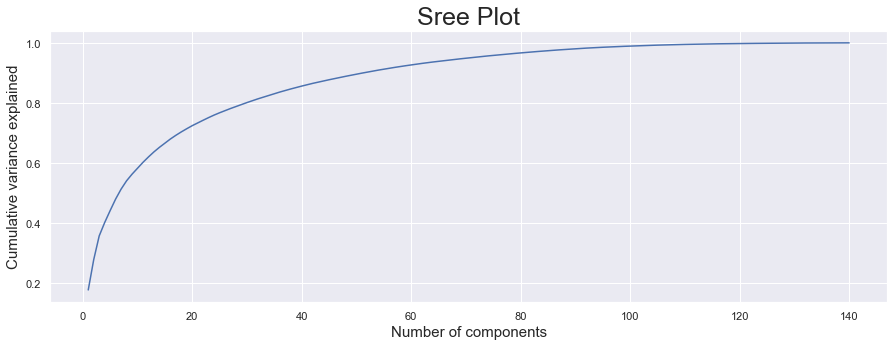

In [71]:
# Making a Sree plot to see explained varaince ratio

var_cumu = np.cumsum(pca.explained_variance_ratio_)

fig = plt.figure(figsize=[15,5])

plt.plot(range(1,len(var_cumu)+1), var_cumu)

plt.ylabel("Cumulative variance explained", fontsize =15)
plt.xlabel('Number of components', fontsize =15)
plt.title('Sree Plot', fontsize = 25)
plt.show()

We will perform PCA With 50 components

In [72]:
# Applying PCA with 50 components

#Instantiate
final_pca = IncrementalPCA(n_components = 50)

#Fitting
df_train_pca = final_pca.fit_transform(X_train)

df_train_pca.shape

(38310, 50)

In [73]:
# Transforming test set

df_test_pca = final_pca.transform(X_test)
df_test_pca.shape

(9004, 50)

### Logistic Regression with L2 regularization

In [74]:
# Libraries for Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [75]:
# Finding optimal regularization parameter

C_param_range = [0.001,0.01,0.1,1,10,100]

acc_table = pd.DataFrame(columns = ['C_parameter', 'Accuracy'])
acc_table['C_parameter'] = C_param_range
j= 0 

for i in C_param_range:
    log_pca = LogisticRegression(penalty = 'l2', C= i, random_state = 42, class_weight = 'balanced')
    log_pca.fit(df_train_pca, y_train)
    y_pred_ta = log_pca.predict(df_test_pca)
    acc_table.iloc[j,1]  = metrics.accuracy_score(y_test, y_pred_ta)
    j+=1
    

acc_table.head()

,C_parameter,Accuracy
0,0.001,0.816082
1,0.010,0.837295
2,0.100,0.836739
3,1.000,0.836295
4,10.000,0.836406


In [76]:
#Hyper parameter tuning

# specify scores/metrics in an iterable
scores = ['accuracy', 'precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for {}".format(score))
    
    #Different parameters to check
    dual=[True,False]
    max_iter=[100,110,120,130,140]
    C_param_range = [0.001,0.01,0.1,1,10,100]

    #Defining number of folds
    folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
    
    #Setting the paramters
    param_grid = dict(dual = dual, max_iter= max_iter, C = C_param_range)
    
    #Setting model
    log_pca = LogisticRegression(penalty = 'l2')
    
    ## set up GridSearch for score metric
    grid_search = GridSearchCV(estimator = log_pca, param_grid = param_grid, cv = folds, n_jobs = -1, scoring=score,
                       return_train_score=True)
    
    #Fitting
    grid_search.fit(df_train_pca, y_train)
    
    print(" The highest {0} score is {1:2.2} at C = {2}".format(score, grid_search.best_score_, grid_search.best_params_))
    print("\n")

# Tuning hyper-parameters for accuracy
 The highest accuracy score is 0.86 at C = {'C': 1, 'dual': False, 'max_iter': 100}


# Tuning hyper-parameters for precision
 The highest precision score is 0.85 at C = {'C': 1, 'dual': False, 'max_iter': 100}


# Tuning hyper-parameters for recall
 The highest recall score is 0.87 at C = {'C': 10, 'dual': False, 'max_iter': 100}




We want our model to have good recall so this are the parameters we will choose

**'C': 10, 'dual': False, 'max_iter': 100 are the best params**

In [77]:
#Instantiate
log_pca = LogisticRegression(penalty = 'l2', dual = False, C= 10, random_state = 42, class_weight = 'balanced', max_iter = 100)

#Fitting
log_model_pca = log_pca.fit(df_train_pca, y_train)

##### Train

In [78]:
# Making Predcition on train set

train_pred_prob = log_model_pca.predict_proba(df_train_pca)

In [79]:
# Looking into area under the curve for train dataset

print("Area under ROC curve for train dataset {:2.2}".format(metrics.roc_auc_score(y_train, train_pred_prob[:,1]) ) )

Area under ROC curve for train dataset 0.93


In [80]:
#Predicting for train data

y_pred_train = log_model_pca.predict(df_train_pca)

In [81]:
# Creating confusion matrix

confusion = metrics.confusion_matrix(y_train, y_pred_train)

In [82]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [83]:
#Looking into accuracy, sensitivity, precision and Specificity

print('Accuracy : {:2.2}'.format(metrics.accuracy_score(y_train, y_pred_train)))
print('Sensitivity/Recall : {:2.2}'.format(metrics.recall_score(y_train, y_pred_train)))
print('Precision : {:2.2}'.format(metrics.precision_score(y_train, y_pred_train)))
print("Specificity : {:2.2}".format(TN/(TN+FP)))

Accuracy : 0.86
Sensitivity/Recall : 0.87
Precision : 0.85
Specificity : 0.84


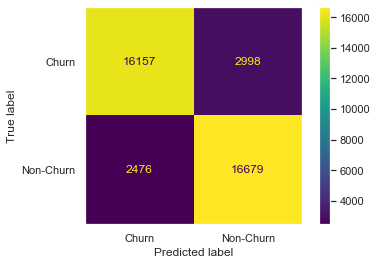

In [84]:
# Plotting Confusion Matrics

plt.rcParams["axes.grid"] = False

metrics.plot_confusion_matrix(log_model_pca, df_train_pca, y_train, values_format = 'n',
                                    display_labels = ['Churn', 'Non-Churn'])
plt.show()

##### Test

In [85]:
# Making Predcition on test set

test_pred_prob = log_model_pca.predict_proba(df_test_pca)

In [86]:
# Looking into area under the curve for train dataset

print("Area under ROC curve for test dataset {:2.2}".format(metrics.roc_auc_score(y_test, test_pred_prob[:,1]) ) )

Area under ROC curve for test dataset 0.88


In [87]:
#Predicting for test data

y_pred = log_model_pca.predict(df_test_pca)

In [88]:
# Creating confusion matrix

confusion = metrics.confusion_matrix(y_test, y_pred)

In [89]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [90]:
#Looking into accuracy, sensitivity, precision and Specificity

print('Accuracy : {:2.2}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Sensitivity/Recall : {:2.2}'.format(metrics.recall_score(y_test, y_pred)))
print('Precision : {:2.2}'.format(metrics.precision_score(y_test, y_pred)))
print("Specificity : {:2.2}".format(TN/(TN+FP)))

Accuracy : 0.84
Sensitivity/Recall : 0.79
Precision : 0.32
Specificity : 0.84


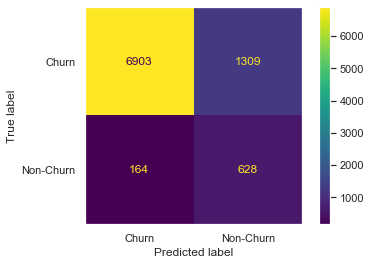

In [91]:
# Plotting Confusion Matrics

plt.rcParams["axes.grid"] = False

metrics.plot_confusion_matrix(log_model_pca, df_test_pca, y_test, values_format = 'n',
                                    display_labels = ['Churn', 'Non-Churn'])
plt.show()

## SVM

In [92]:
# Importing libraries

from sklearn.svm import SVC

In [93]:
#Hyper parameter tuning

# specify scores/metrics in an iterable
scores = ['accuracy', 'precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for {}".format(score))
    
    #Defining number of folds
    folds = KFold(n_splits = 3, shuffle = True, random_state = 42)
    
    #Setting the paramters
    hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]
    
    #Setting model
    svm_pca = SVC(kernel="rbf")
    
    #Set up GridSearch for score metric
    grid_search = GridSearchCV(estimator = svm_pca, param_grid = hyper_params, cv = folds, n_jobs = -1, scoring=score,
                       return_train_score=True)
    
    #Fitting
    grid_search.fit(df_train_pca, y_train)
    
    print(" The highest {0} score is {1:2.2} at C = {2}".format(score, grid_search.best_score_, grid_search.best_params_))
    print("\n")

# Tuning hyper-parameters for accuracy
 The highest accuracy score is 0.93 at C = {'C': 1000, 'gamma': 0.01}


# Tuning hyper-parameters for precision
 The highest precision score is 0.92 at C = {'C': 1000, 'gamma': 0.01}


# Tuning hyper-parameters for recall
 The highest recall score is 0.95 at C = {'C': 1000, 'gamma': 0.01}




We want our model to have good recall so this are the parameters we will choose

**'C': 1000 and 'gamma': 0.01 are the best params**

In [94]:
# specify optimal hyperparameters
best_params = {"C": 1000, "gamma": 0.01, "kernel":"rbf"}

# model
svm_pca = SVC(C=1000, gamma=0.0001, kernel="rbf")

#Fitting
svm_pca.fit(df_train_pca, y_train)


#Predicting
y_pred = svm_pca.predict(df_train_pca)

##### Train

In [95]:
# Creating confusion matrix

confusion = metrics.confusion_matrix(y_train, y_pred)

In [96]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [97]:
#Looking into accuracy, sensitivity, precision and Specificity

print('Accuracy : {:2.2}'.format(metrics.accuracy_score(y_train, y_pred)))
print('Sensitivity/Recall : {:2.2}'.format(metrics.recall_score(y_train, y_pred)))
print('Precision : {:2.2}'.format(metrics.precision_score(y_train, y_pred)))
print("Specificity : {:2.2}".format(TN/(TN+FP)))

Accuracy : 0.86
Sensitivity/Recall : 0.87
Precision : 0.86
Specificity : 0.86


##### Test

In [98]:
#Predicting on test

y_pred_test = svm_pca.predict(df_test_pca)

In [99]:
# Creating confusion matrix

confusion = metrics.confusion_matrix(y_test, y_pred_test)

In [100]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [101]:
#Looking into accuracy, sensitivity, precision and Specificity

print('Accuracy : {:2.2}'.format(metrics.accuracy_score(y_test, y_pred_test)))
print('Sensitivity/Recall : {:2.2}'.format(metrics.recall_score(y_test, y_pred_test)))
print('Precision : {:2.2}'.format(metrics.precision_score(y_test, y_pred_test)))
print("Specificity : {:2.2}".format(TN/(TN+FP)))

Accuracy : 0.85
Sensitivity/Recall : 0.79
Precision : 0.35
Specificity : 0.86


### Logistic Regression with L1 regurlization

In [102]:
# Finding optimal regularization parameter

C_param_range = [0.001,0.01,0.1,1,10,100]

acc_table = pd.DataFrame(columns = ['C_parameter', 'Accuracy'])
acc_table['C_parameter'] = C_param_range
j= 0 

for i in C_param_range:
    log_reg_pca = LogisticRegression(penalty = 'l1', C= i, random_state = 42, class_weight = 'balanced', solver = 'saga')
    log_reg_pca.fit(df_train_pca, y_train)
    y_pred_ta = log_reg_pca.predict(df_test_pca)
    acc_table.iloc[j,1]  = metrics.accuracy_score(y_test, y_pred_ta)
    j+=1
    

acc_table.head()

,C_parameter,Accuracy
0,0.001,0.762439
1,0.010,0.833518
2,0.100,0.836517
3,1.000,0.836295
4,10.000,0.836406


In [103]:
#Hyper parameter tuning

# specify scores/metrics in an iterable
scores = ['accuracy', 'precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for {}".format(score))
    
    #Different parameters to check
    
    dual=[True,False]
    max_iter=[100,110,120,130,140]
    C_param_range = [0.001,0.01,0.1,1,10,100]

    #Defining number of folds
    folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
    
    #Setting the paramters
    param_grid = dict(dual = dual, max_iter= max_iter, C = C_param_range)
    
    #Setting model
    log_reg_pca = LogisticRegression(penalty = 'l1', solver = 'saga')
    
    ## set up GridSearch for score metric
    grid_search = GridSearchCV(estimator = log_reg_pca, param_grid = param_grid, cv = folds, n_jobs = -1, scoring=score,
                       return_train_score=True)
    
    #Fitting
    grid_search.fit(df_train_pca, y_train)
    
    print(" The highest {0} score is {1:2.2} at C = {2}".format(score, grid_search.best_score_, grid_search.best_params_))
    print("\n")

# Tuning hyper-parameters for accuracy
 The highest accuracy score is 0.86 at C = {'C': 100, 'dual': False, 'max_iter': 100}


# Tuning hyper-parameters for precision
 The highest precision score is 0.85 at C = {'C': 100, 'dual': False, 'max_iter': 100}


# Tuning hyper-parameters for recall
 The highest recall score is 0.87 at C = {'C': 10, 'dual': False, 'max_iter': 100}




We want our model to have good recall so this are the parameters we will choose

**'C': 100, 'dual': False, 'max_iter': 100 are the best params**

In [104]:
#Instantiate
log_reg_pca = LogisticRegression(penalty = 'l1', solver = 'saga', C = 100, dual = False, max_iter = 100)

#Fitting
log_reg_model_pca = log_reg_pca.fit(df_train_pca, y_train)

##### Train

In [105]:
# Making Predcition on train set

train_pred_prob = log_reg_model_pca.predict_proba(df_train_pca)

In [106]:
# Looking into area under the curve for train dataset

print("Area under ROC curve for train data-set {:2.2}".format(metrics.roc_auc_score(y_train, train_pred_prob[:,1]) ) )

Area under ROC curve for train data-set 0.93


In [107]:
#Predicting for train data

y_pred_train = log_reg_model_pca.predict(df_train_pca)

In [108]:
# Creating confusion matrix

confusion = metrics.confusion_matrix(y_train, y_pred_train)

In [109]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [110]:
#Looking into accuracy, sensitivity, precision and Specificity

print('Accuracy : {:2.2}'.format(metrics.accuracy_score(y_train, y_pred_train)))
print('Sensitivity/Recall : {:2.2}'.format(metrics.recall_score(y_train, y_pred_train)))
print('Precision : {:2.2}'.format(metrics.precision_score(y_train, y_pred_train)))
print("Specificity : {:2.2}".format(TN/(TN+FP)))

Accuracy : 0.86
Sensitivity/Recall : 0.87
Precision : 0.85
Specificity : 0.84


##### Test

In [111]:
# Making Predcition on test set

test_pred_prob = log_reg_model_pca.predict_proba(df_test_pca)

In [112]:
# Looking into area under the curve for train dataset

print("Area under ROC curve for test data-set {:2.2}".format(metrics.roc_auc_score(y_test, test_pred_prob[:,1]) ) )

Area under ROC curve for test data-set 0.88


In [113]:
#Predicting for test data

y_pred = log_reg_model_pca.predict(df_test_pca)

In [114]:
# Creating confusion matrix

confusion = metrics.confusion_matrix(y_test, y_pred)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [115]:
#Looking into accuracy, sensitivity, precision and Specificity

print('Accuracy : {:2.2}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Sensitivity/Recall : {:2.2}'.format(metrics.recall_score(y_test, y_pred)))
print('Precision : {:2.2}'.format(metrics.precision_score(y_test, y_pred)))
print("Specificity : {:2.2}".format(TN/(TN+FP)))

Accuracy : 0.84
Sensitivity/Recall : 0.79
Precision : 0.32
Specificity : 0.84


### Random Forest

In [116]:
# Importimg libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [117]:
#Instantiate

rfc = RandomForestClassifier()

#Fitting

rfc_fit = rfc.fit(df_train_pca, y_train)

In [118]:
# Making Predictions

prediction = rfc_fit.predict(df_test_pca)

In [119]:
print("Accuracy: {0:2.2}". format(accuracy_score(y_test,prediction)))

Accuracy: 0.91


###### Finding optimal hyper parameters

In [122]:
#Defining number of folds
folds = KFold(n_splits = 3, shuffle = True, random_state = 42)


#Defining paramters

param_grid = {
    'max_depth' : [4,8,10],
    'min_samples_leaf' : range(100,400,200),
    'min_samples_split' : range(200,500,200),
    'n_estimators' : [100,200,300],
    'max_features' : [5,10]   
}

# Create a based model
rfc = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = folds, n_jobs = -1, verbose = 1)

In [123]:
#Fitting the data

grid_search.fit(df_train_pca, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 16.7min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [124]:
# printing the optimal accuracy score and hyperparameters

print('We can get accuracy of',round(grid_search.best_score_,2),'using',grid_search.best_params_)

We can get accuracy of 0.86 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


**Fitting the final model with the best parameters obtained from grid search.**

In [125]:
# model with the best hyperparameters
rfc = RandomForestClassifier(bootstrap=True,class_weight = "balanced", criterion = 'gini',
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=200)
rfc_fit = rfc.fit(df_train_pca, y_train)

##### Train

In [126]:
#Predicitng on train
y_pred_train = rfc_fit.predict(df_train_pca)

In [127]:
# Creating confusion matrix

confusion = metrics.confusion_matrix(y_train, y_pred_train)

In [128]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [129]:
#Looking into accuracy, sensitivity, precision and Specificity

print("Accuracy : {:2.2}".format(metrics.accuracy_score(y_train, y_pred_train)))
print("Sensitivity/Recall : {:2.2}".format(metrics.recall_score(y_train, y_pred_train)))
print('Precision : {:2.2}'.format(metrics.precision_score(y_train, y_pred_train)))
print("Specificity : {:2.2}".format(TN/(TN+FP)))

Accuracy : 0.88
Sensitivity/Recall : 0.86
Precision : 0.89
Specificity : 0.89


##### Test

In [130]:
#Predicitng on test
y_pred_test = rfc_fit.predict(df_test_pca)

In [131]:
# Creating confusion matrix

confusion = metrics.confusion_matrix(y_test, y_pred_test)

In [132]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [133]:
#Looking into accuracy, sensitivity, precision and Specificity

print("Accuracy : {:2.2}".format(metrics.accuracy_score(y_test, y_pred_test)))
print("Sensitivity/Recall : {:2.2}".format(metrics.recall_score(y_test, y_pred_test)))
print('Precision : {:2.2}'.format(metrics.precision_score(y_test, y_pred_test)))
print("Specificity : {:2.2}".format(TN/(TN+FP)))

Accuracy : 0.87
Sensitivity/Recall : 0.72
Precision : 0.38
Specificity : 0.89


## b. Interpretiable Model

###  Logistic Regression

In [134]:
# Finding optimal regularization parameter

C_param_range = [0.001,0.01,0.1,1,10,100]

acc_table = pd.DataFrame(columns = ['C_parameter', 'Accuracy'])
acc_table['C_parameter'] = C_param_range
j= 0 

for i in C_param_range:
    logreg = LogisticRegression(penalty = 'l2', C= i, random_state = 42, class_weight = 'balanced')
    logreg.fit(X_train, y_train)
    y_pred_ta = logreg.predict(X_test)
    acc_table.iloc[j,1]  = metrics.accuracy_score(y_test, y_pred_ta)
    j+=1
    

acc_table.head()

,C_parameter,Accuracy
0,0.001,0.819191
1,0.010,0.845957
2,0.100,0.852621
3,1.000,0.854398
4,10.000,0.855842


In [135]:
#Hyper parameter tuning

# specify scores/metrics in an iterable
scores = ['accuracy', 'precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for {}".format(score))
    
    #Different parameters to check
    
    dual=[True,False]
    max_iter=[100,110,120,130,140]
    C_param_range = [0.001,0.01,0.1,1,10,100]

    #Defining number of folds
    folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
    
    #Setting the paramters
    param_grid = dict(dual = dual, max_iter= max_iter, C = C_param_range)
    
    #Setting model
    log_pca = LogisticRegression(penalty = 'l2')
    
    ## set up GridSearch for score metric
    grid_search = GridSearchCV(estimator = log_pca, param_grid = param_grid, cv = folds, n_jobs = -1, scoring=score,
                       return_train_score=True)
    
    #Fitting
    grid_search.fit(X_train, y_train)
    
    print(" The highest {0} score is {1:2.2} at C = {2}".format(score, grid_search.best_score_, grid_search.best_params_))
    print("\n")

# Tuning hyper-parameters for accuracy
 The highest accuracy score is 0.87 at C = {'C': 100, 'dual': False, 'max_iter': 110}


# Tuning hyper-parameters for precision
 The highest precision score is 0.87 at C = {'C': 100, 'dual': False, 'max_iter': 130}


# Tuning hyper-parameters for recall
 The highest recall score is 0.88 at C = {'C': 10, 'dual': False, 'max_iter': 100}




This are parameters which we will use

**'C': 100, 'dual': False, 'max_iter': 105 are the best params**

In [136]:
# create a LogisticRegression object

logreg = LogisticRegression(penalty = 'l2', C = 100, dual = False, max_iter = 105, class_weight = 'balanced')

In [137]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE

#Selecting 15 features

rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [138]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 97),
 ('arpu_7', True, 1),
 ('arpu_8', False, 102),
 ('onnet_mou_6', False, 31),
 ('onnet_mou_7', False, 56),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 33),
 ('offnet_mou_7', False, 74),
 ('offnet_mou_8', False, 54),
 ('roam_ic_mou_6', False, 93),
 ('roam_ic_mou_7', False, 86),
 ('roam_ic_mou_8', False, 101),
 ('roam_og_mou_6', False, 90),
 ('roam_og_mou_7', False, 58),
 ('roam_og_mou_8', False, 12),
 ('loc_og_t2t_mou_6', False, 67),
 ('loc_og_t2t_mou_7', False, 117),
 ('loc_og_t2t_mou_8', False, 8),
 ('loc_og_t2m_mou_6', False, 37),
 ('loc_og_t2m_mou_7', False, 57),
 ('loc_og_t2m_mou_8', False, 11),
 ('loc_og_t2f_mou_6', False, 106),
 ('loc_og_t2f_mou_7', False, 79),
 ('loc_og_t2f_mou_8', False, 44),
 ('loc_og_t2c_mou_6', False, 92),
 ('loc_og_t2c_mou_7', False, 120),
 ('loc_og_t2c_mou_8', False, 96),
 ('loc_og_mou_6', False, 72),
 ('loc_og_mou_7', False, 80),
 ('loc_og_mou_8', False, 10),
 ('std_og_t2t_mou_6', False, 70),
 ('std_og_t2t_mou_7', False, 30),

In [139]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [140]:
# Select only the columns selected by RFE for X_train and X_test

X_train = X_train[col]
X_test = X_test[col]

In [141]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38310
Model:                            GLM   Df Residuals:                    38294
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13779.
Date:                Mon, 18 May 2020   Deviance:                       27558.
Time:                        22:06:34   Pearson chi2:                 1.79e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.5620      0.036     43.998      0.000       1.492       1.632
arpu_7                   2.7730      0.084     33.165      0.000       2.609       2.937
onnet_mou_8              4.9772      0.249     19.989      0.000       4.489       5.465
std_og_t2t_mou_8        -4.7935      0.243    -19.752      0.000      -5.269      -4.318
std_og_mou_8             7.4940      0.273     27.460      0.000       6.959       8.029
total_og_mou_8         -10.2702      0.306    -33.541      0.000     -10.870      -9.670
loc_ic_mou_8             1.6778      0.239      7.012      0.000       1.209       2.147
total_ic_mou_8          -4.7122      0.237    -19.924      0.000      -5.176      -4.249
spl_ic_mou_8            -2.0264      0.108    -18.807      0.000      -2.238      -1.815
total_rech_num_8        -2.0670      0.085    -24.284      0.000      -2.234      -1.900
last_day_rch_amt_8      -2.4766      0.065    -38.120      0.000      -2.604      -2.349
total_rech_data_8        2.4718      0.118     21.000      0.000       2.241       2.702
night_pck_user_6_1.0    -1.9439      0.280     -6.942      0.000      -2.493      -1.395
fb_user_7_0.0           -1.7924      0.142    -12.600      0.000      -2.071      -1.514
fb_user_8_0.0           -2.8293      0.121    -23.306      0.000      -3.067      -2.591
fb_user_8_1.0           -3.4331      0.078    -43.869      0.000      -3.586      -3.280
========================================================================================
"""

We can see that all the variables have p value less than 0.005

In [142]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [143]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.reset_index(drop = True, inplace = True)
vif

,Features,VIF
0,total_og_mou_8,17.47
1,std_og_mou_8,13.90
2,onnet_mou_8,12.89
3,std_og_t2t_mou_8,12.32
4,loc_ic_mou_8,10.84
5,total_ic_mou_8,10.57
6,total_rech_num_8,3.72
7,arpu_7,3.19
8,total_rech_data_8,3.11
9,fb_user_8_1.0,2.99


In [144]:
# Dropping the value which is greater than vif value of 5

X_train.drop('total_og_mou_8', axis = 1, inplace = True)

In [145]:
# Refit the model with the new set of features

logm2 = sm.GLM(y_train, (sm.add_constant(X_train)), familiy = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38310
Model:                            GLM   Df Residuals:                    38295
Model Family:                Gaussian   Df Model:                           14
Link Function:               identity   Scale:                         0.13253
Method:                          IRLS   Log-Likelihood:                -15640.
Date:                Mon, 18 May 2020   Deviance:                       5075.1
Time:                        22:06:35   Pearson chi2:                 5.08e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.8068      0.004    195.320      0.000       0.799       0.815
arpu_7                   0.3076      0.009     34.996      0.000       0.290       0.325
onnet_mou_8             -0.0182      0.018     -0.989      0.323      -0.054       0.018
std_og_t2t_mou_8        -0.0261      0.020     -1.277      0.202      -0.066       0.014
std_og_mou_8            -0.1458      0.013    -11.534      0.000      -0.171      -0.121
loc_ic_mou_8            -0.0652      0.020     -3.183      0.001      -0.105      -0.025
total_ic_mou_8          -0.5365      0.020    -26.823      0.000      -0.576      -0.497
spl_ic_mou_8            -0.2321      0.010    -23.056      0.000      -0.252      -0.212
total_rech_num_8        -0.4315      0.010    -42.053      0.000      -0.452      -0.411
last_day_rch_amt_8      -0.4355      0.007    -59.691      0.000      -0.450      -0.421
total_rech_data_8        0.2450      0.013     19.312      0.000       0.220       0.270
night_pck_user_6_1.0    -0.1774      0.025     -7.144      0.000      -0.226      -0.129
fb_user_7_0.0           -0.1807      0.013    -13.646      0.000      -0.207      -0.155
fb_user_8_0.0           -0.3461      0.012    -28.970      0.000      -0.370      -0.323
fb_user_8_1.0           -0.3970      0.007    -54.320      0.000      -0.411      -0.383
========================================================================================
"""

In [146]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.reset_index(drop = True, inplace = True)
vif

,Features,VIF
0,loc_ic_mou_8,10.50
1,total_ic_mou_8,10.48
2,std_og_t2t_mou_8,9.00
3,onnet_mou_8,8.46
4,std_og_mou_8,4.38
5,total_rech_num_8,3.68
6,arpu_7,3.18
7,total_rech_data_8,3.11
8,fb_user_8_1.0,2.99
9,last_day_rch_amt_8,2.03


In [147]:
# Dropping the value which is greater than vif value of 5

X_train.drop('onnet_mou_8', axis = 1, inplace = True)

In [148]:
# Refit the model with the new set of features

logm3 = sm.GLM(y_train, (sm.add_constant(X_train)), familiy = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38310
Model:                            GLM   Df Residuals:                    38296
Model Family:                Gaussian   Df Model:                           13
Link Function:               identity   Scale:                         0.13253
Method:                          IRLS   Log-Likelihood:                -15641.
Date:                Mon, 18 May 2020   Deviance:                       5075.2
Time:                        22:06:35   Pearson chi2:                 5.08e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.8070      0.004    195.601      0.000       0.799       0.815
arpu_7                   0.3066      0.009     35.124      0.000       0.289       0.324
std_og_t2t_mou_8        -0.0424      0.012     -3.550      0.000      -0.066      -0.019
std_og_mou_8            -0.1447      0.013    -11.492      0.000      -0.169      -0.120
loc_ic_mou_8            -0.0685      0.020     -3.386      0.001      -0.108      -0.029
total_ic_mou_8          -0.5357      0.020    -26.805      0.000      -0.575      -0.497
spl_ic_mou_8            -0.2317      0.010    -23.035      0.000      -0.251      -0.212
total_rech_num_8        -0.4329      0.010    -42.595      0.000      -0.453      -0.413
last_day_rch_amt_8      -0.4364      0.007    -60.241      0.000      -0.451      -0.422
total_rech_data_8        0.2456      0.013     19.386      0.000       0.221       0.270
night_pck_user_6_1.0    -0.1774      0.025     -7.142      0.000      -0.226      -0.129
fb_user_7_0.0           -0.1816      0.013    -13.736      0.000      -0.207      -0.156
fb_user_8_0.0           -0.3466      0.012    -29.035      0.000      -0.370      -0.323
fb_user_8_1.0           -0.3970      0.007    -54.318      0.000      -0.411      -0.383
========================================================================================
"""

In [149]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.reset_index(drop = True, inplace = True)
vif

,Features,VIF
0,total_ic_mou_8,10.47
1,loc_ic_mou_8,10.26
2,std_og_mou_8,4.34
3,total_rech_num_8,3.62
4,arpu_7,3.15
5,total_rech_data_8,3.10
6,std_og_t2t_mou_8,3.09
7,fb_user_8_1.0,2.99
8,last_day_rch_amt_8,2.00
9,fb_user_8_0.0,1.50


In [150]:
# Dropping the value which is greater than vif value of 5

X_train.drop('total_ic_mou_8', axis = 1, inplace = True)

In [151]:
# Refit the model with the new set of features

logm4 = sm.GLM(y_train, (sm.add_constant(X_train)), familiy = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38310
Model:                            GLM   Df Residuals:                    38297
Model Family:                Gaussian   Df Model:                           12
Link Function:               identity   Scale:                         0.13501
Method:                          IRLS   Log-Likelihood:                -15997.
Date:                Mon, 18 May 2020   Deviance:                       5170.4
Time:                        22:06:36   Pearson chi2:                 5.17e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.8296      0.004    203.491      0.000       0.822       0.838
arpu_7                   0.2926      0.009     33.274      0.000       0.275       0.310
std_og_t2t_mou_8        -0.0365      0.012     -3.032      0.002      -0.060      -0.013
std_og_mou_8            -0.1853      0.013    -14.694      0.000      -0.210      -0.161
loc_ic_mou_8            -0.5548      0.009    -61.690      0.000      -0.572      -0.537
spl_ic_mou_8            -0.2430      0.010    -23.953      0.000      -0.263      -0.223
total_rech_num_8        -0.4615      0.010    -45.243      0.000      -0.482      -0.442
last_day_rch_amt_8      -0.4637      0.007    -64.066      0.000      -0.478      -0.450
total_rech_data_8        0.2471      0.013     19.323      0.000       0.222       0.272
night_pck_user_6_1.0    -0.1732      0.025     -6.909      0.000      -0.222      -0.124
fb_user_7_0.0           -0.1816      0.013    -13.615      0.000      -0.208      -0.155
fb_user_8_0.0           -0.3574      0.012    -29.685      0.000      -0.381      -0.334
fb_user_8_1.0           -0.4101      0.007    -55.706      0.000      -0.424      -0.396
========================================================================================
"""

In [152]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.reset_index(drop = True, inplace = True)
vif

,Features,VIF
0,std_og_mou_8,4.25
1,total_rech_num_8,3.61
2,arpu_7,3.12
3,total_rech_data_8,3.10
4,std_og_t2t_mou_8,3.09
5,fb_user_8_1.0,2.98
6,loc_ic_mou_8,2.08
7,last_day_rch_amt_8,1.98
8,fb_user_8_0.0,1.49
9,fb_user_7_0.0,1.21


All the p-values and VIF are now in the appropriate range

In [153]:
#Prediciting the values of X train

y_train_pred = res.predict(sm.add_constant(X_train))

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [154]:
# Creating a dataframe with churn and churn proabilities

y_train_pred_final = pd.DataFrame({'Churned': y_train, 'Churn_Proab':y_train_pred})
y_train_pred_final['Churn_Proab'] = round(y_train_pred_final['Churn_Proab'],2)
y_train_pred_final.head(2)

,Churned,Churn_Proab
0,0,0.17
1,0,0.20


###### Finding the Optimal Cutoff

In [155]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [156]:
#Storing the values for FPR, TPR and thersolds

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Churned'], y_train_pred_final['Churn_Proab'], drop_intermediate = False )

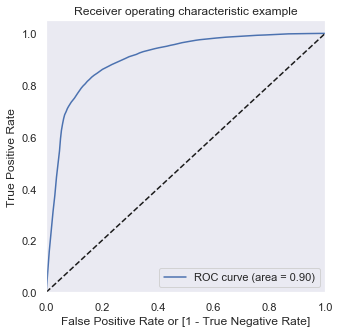

In [157]:
# Call the ROC function

draw_roc(y_train_pred_final['Churned'], y_train_pred_final['Churn_Proab'])

In [158]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Churn_Proab'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(2)

,Churned,Churn_Proab,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.17,1,1,0,0,0,0,0,0,0,0
1,0,0.20,1,1,0,0,0,0,0,0,0,0


In [159]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Churned'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.590890  0.995615  0.186165
0.1   0.1  0.638606  0.989977  0.287236
0.2   0.2  0.691647  0.980893  0.402401
0.3   0.3  0.743748  0.960741  0.526755
0.4   0.4  0.794936  0.924667  0.665205
0.5   0.5  0.827199  0.866823  0.787575
0.6   0.6  0.831480  0.788410  0.874550
0.7   0.7  0.813391  0.698460  0.928322
0.8   0.8  0.687706  0.409345  0.966066
0.9   0.9  0.551553  0.110937  0.992169


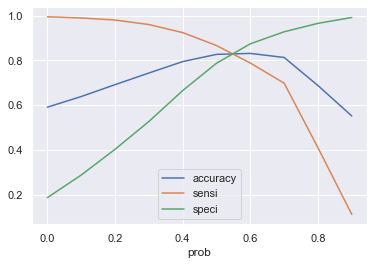

In [160]:
# Plotting sensitivity, accuracy and specificity

sns.set()
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As we can see that around 0.5, you get the optimal values of the three metrics.

In [161]:
#Creating final predicated column

y_train_pred_final['final_predicted'] = y_train_pred_final['Churn_Proab'].map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head(2)

,Churned,Churn_Proab,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.17,1,1,0,0,0,0,0,0,0,0,0
1,0,0.20,1,1,0,0,0,0,0,0,0,0,0


#### Predicting values on training data

In [162]:
#Looking into the accuray of training data set

print("Accuracy : {:2.2}".format(metrics.accuracy_score(y_train_pred_final['Churned'], y_train_pred_final['final_predicted'])))

Accuracy : 0.83


In [163]:
# Creating confusion Matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final['Churned'], y_train_pred_final['final_predicted'])
confusion2

array([[15086,  4069],
       [ 2551, 16604]], dtype=int64)

In [164]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [165]:
# Looking into sensitivity and specificity

print("Sensitivity : {:2.2}".format(TP/(TP+FN)))
print("Specificity : {:2.2}".format(TN/(TN+FP)))

Sensitivity : 0.87
Specificity : 0.79


#### Making predictions on Test data

In [166]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test)

In [167]:
# Drop the required columns from X_test as well

X_test.drop(['total_ic_mou_8','onnet_mou_8','total_og_mou_8',], axis = 1, inplace = True)

In [168]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [169]:
# Converting y_pred to a dataframe

y_pred1 = pd.DataFrame(y_test_pred)
y_pred1.reset_index(drop = True, inplace = True)

In [170]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)
y_test_df.reset_index(drop=True, inplace=True)

In [171]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred1],axis=1)
y_pred_final.columns = ['Churn', 'Churn_Proab']
y_pred_final['Churn_Proab'] = round(y_pred_final['Churn_Proab'], 2)
y_pred_final.head()

,Churn,Churn_Proab
0,0,0.12
1,1,0.96
2,0,0.18
3,0,0.17
4,0,0.29


In [172]:
# Make predictions on the test set using 0.57 as the cutoff

y_pred_final['final_predicted'] = y_pred_final['Churn_Proab'].map(lambda x: 1 if x > 0.5 else 0)


y_pred_final.head()

,Churn,Churn_Proab,final_predicted
0,0,0.12,0
1,1,0.96,1
2,0,0.18,0
3,0,0.17,0
4,0,0.29,0


In [173]:
#Looking into the accuray of testing data set

print("Accuracy : {:2.2}".format(metrics.accuracy_score(y_pred_final['Churn'], y_pred_final['final_predicted'])))

Accuracy : 0.79


In [174]:
#Confusion matrix

confusion1 = metrics.confusion_matrix(y_pred_final['Churn'], y_pred_final['final_predicted'])
confusion1

array([[6444, 1768],
       [ 165,  627]], dtype=int64)

In [175]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [176]:
# Looking into sensitivity and specificity

print("Sensitivity : {:2.2}".format(TP/(TP+FN)))
print("Specificity : {:2.2}".format(TN/(TN+FP)))
print("Precision : {:2.2}".format(TP/(TP+FP)))

Sensitivity : 0.79
Specificity : 0.78
Precision : 0.26


In [177]:
#Top 10 features

IP = pd.DataFrame(res.params , columns = ['Importance'])
IP.reset_index(inplace = True)
IP.columns = ['Features', 'Importance']
IP.drop(IP.index[0], inplace = True)
IP = IP.sort_values(by = 'Importance', ascending = False)
IP.reset_index(drop = True, inplace =True)
IP['Importance'] =  round(IP['Importance'], 2)
IP.head(10)

,Features,Importance
0,arpu_7,0.29
1,total_rech_data_8,0.25
2,std_og_t2t_mou_8,-0.04
3,night_pck_user_6_1.0,-0.17
4,fb_user_7_0.0,-0.18
5,std_og_mou_8,-0.19
6,spl_ic_mou_8,-0.24
7,fb_user_8_0.0,-0.36
8,fb_user_8_1.0,-0.41
9,total_rech_num_8,-0.46


###  Random Forest

In [178]:
#Instatntiate

rf = RandomForestClassifier()

#Fitting
rf.fit(rf_X_train, y_train)

RandomForestClassifier()

In [179]:
# Making predictions

predictions = rf.predict(rf_X_test)

In [180]:
#Accuracy

print("Accuracy: {0:2.2}". format(accuracy_score(y_test,predictions)))

Accuracy: 0.93


#### Grid Search to Find Optimal Hyperparameters

In [181]:
folds = KFold(n_splits = 3, shuffle = True, random_state = 42)

param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = folds, n_jobs = -1,verbose = 1)

In [182]:
# Fit the grid search to the data

grid_search.fit(rf_X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  8.4min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [183]:
# printing the optimal accuracy score and hyperparameters

print('We can get accuracy of',round(grid_search.best_score_,2),'using',grid_search.best_params_)

We can get accuracy of 0.9 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [193]:
# model with the best hyperparameters

rf = RandomForestClassifier(bootstrap=True,class_weight = "balanced", criterion = 'gini',
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=200)
rf_fit = rf.fit(rf_X_train, y_train)

In [194]:
#Predicitng on train

y_pred_train = rf_fit.predict(rf_X_train)

In [195]:
# Creating confusion matrix

confusion = metrics.confusion_matrix(y_train, y_pred_train)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [196]:
#Looking into accuracy, sensitivity, precision and Specificity

print("Accuracy : {:2.2}".format(metrics.accuracy_score(y_train, y_pred_train)))
print("Sensitivity/Recall : {:2.2}".format(metrics.recall_score(y_train, y_pred_train)))
print('Precision : {:2.2}'.format(metrics.precision_score(y_train, y_pred_train)))
print("Specificity : {:2.2}".format(TN/(TN+FP)))

Accuracy : 0.91
Sensitivity/Recall : 0.91
Precision : 0.92
Specificity : 0.92


In [197]:
#Predicitng on test

y_pred_test = rf_fit.predict(rf_X_test)

In [198]:
# Creating confusion matrix

confusion = metrics.confusion_matrix(y_test, y_pred_test)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [199]:
#Looking into accuracy, sensitivity, precision and Specificity

print("Accuracy : {:2.2}".format(metrics.accuracy_score(y_test, y_pred_test)))
print("Sensitivity/Recall : {:2.2}".format(metrics.recall_score(y_test, y_pred_test)))
print('Precision : {:2.2}'.format(metrics.precision_score(y_test, y_pred_test)))
print("Specificity : {:2.2}".format(TN/(TN+FP)))

Accuracy : 0.91
Sensitivity/Recall : 0.76
Precision : 0.49
Specificity : 0.92


In [200]:
#Top prediciting variables

Rand_imp = pd.concat((pd.DataFrame(X.columns, columns = ['Varibales']), 
          pd.DataFrame(rf_fit.feature_importances_, columns = ['Importance'])), axis = 1).sort_values(by = 'Importance', ascending = False).head(10).reset_index(drop = True)
Rand_imp['Importance'] = round(Rand_imp['Importance'],2)
Rand_imp.head(10)

,Varibales,Importance
0,total_ic_mou_8,0.08
1,roam_ic_mou_8,0.08
2,roam_og_mou_8,0.07
3,arpu_8,0.06
4,total_rech_amt_8,0.05
5,max_rech_amt_8,0.05
6,loc_og_mou_8,0.05
7,total_og_mou_8,0.05
8,last_day_rch_amt_8,0.05
9,loc_ic_t2m_mou_8,0.04


## 10. Summary

**Model with PCA's**

1. Logistic Regression with L2 regularization
    - Accuracy : 0.84
    - Sensitivity/Recall : 0.79
    - Specificity : 0.84
<br><br>
2. Support Vector Machine
    - Accuracy : 0.85
    - Sensitivity/Recall : 0.79
    - Specificity : 0.86
    <br><br>
3. Logistic Regression with L1 regularization
     - Accuracy : 0.84
     - Sensitivity/Recall : 0.79
     - Specificity : 0.84
    <br><br>
4. Random Forest
    - Accuracy : 0.87
    - Sensitivity/Recall : 0.72
    - Specificity : 0.89

**Interpretable Model**

5. Logistic Regression
    - Accuracy : 0.79
    - Sensitivity : 0.79
    - Specificity : 0.78
    <br><br>
6. Random Forest
    - Accuracy : 0.91
    - Sensitivity/Recall : 0.76
    - Specificity : 0.92

We need to have model which good sensitivity so that we can predict the customers who are about to churn and reatin them with stragties and also the model should have good specificity so that we are not giving offers to unnecssary customers, so that we dont incur unnecssary losses
    <br><br>
We see that Accuracy, Sensitivity and Specificty of all our models are above 0.70 and its good

**Top predictors that we need to focus on:**<br> <br>
   1. Service Scheme for FB
   2. Avergae revenue per user during the good phase
   3. Total recharge done for data
   4. Special incoming call and STD out going call's
   5. Roaming incoming and outgoing call's minutes of usage
   6. Total incoming call's
   7. Total outgoing call's
   8. Local outgoing call's
   9. Maximum recharge done
   10. Last day when recharge was done
   
_Most of our predictor's indicate this features during action phase i.e. month of August and we need to keenly focus during this time and try to retain High value coustomers_

**``Recommendation and Stratigies to retain customers``**

1. <u>Having interactions with customers</u> : We need to provide them the with content and benefits of our packages and products<br><br>
2. <u>Offering Incentives</u> : Offering discounts and special offers to the customers whom we have predicted that would churn<br><br>
3. <u>Giving Better Servies</u> : Providing the right customer servies would make the customers to stay with our company instead of going to others and this has been identified as one the most important factor in telecom industry<br><br>
4. <u>Paying attention to complaints</u> : Providing right customer support and resolving customers issues would also result in customer retention<br><br>
5. <u>Making our best people to deal with cancellation</u>: Sometimes our best representative with his good communication skills can make the customer stay 